# ETL

In [1]:
import h2o
# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O

# crear cluster de h2o
h2o.init(nthreads = 3, max_mem_size = 8)

h2o:1: DeprecationWarning: Your Python version is 3.10.9. The support for this version will be removed in H2O 3.42.0.1.


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 10 mins
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,1 month and 22 days
H2O_cluster_name:,H2O_from_python_diego_pc_e9aq4m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.957 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,3
H2O_cluster_status:,"locked, healthy"


## Cargar bases de datos

In [4]:
loan_csv = "loan.csv"  # modify this for your machine
# Alternatively, you can import the data directly from a URL
#loan_csv = "https://raw.githubusercontent.com/h2oai/app-consumer-loan/master/data/loan.csv"
data = h2o.import_file('data/Personas.txt')  # 163,987 rows x 15 columns

data.describe()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:45060
Cols:111

,﻿identificador_hogar,identificador_persona,age,AREA,demencia,diferenciador,edad2,edad44,encuestador,escolarizado,estado_encuesta,estado_encuesta_adolece,estado_encuesta_adultos,estado_encuesta_ninos,EstadoCivil,fex,idfin,m0_p1,m0_p10,m0_p10__1,m0_p10__2,m0_p10__3,m0_p10__4,m0_p11,m0_p2,m0_p2__1,m0_p2__2,m0_p2__3,m0_p2__4,m0_p2__5,m0_p2__6,m0_p3,m0_p4,m0_p5,m0_p6,m0_p6__1,m0_p6__2,m0_p6__3,m0_p6__4,m0_p6__5,m0_p7,m0_p7__1,m0_p7__2,m0_p7__3,m0_p7__4,m0_p8,m0_p8__1,m0_p8__2,m0_p8__3,m0_p8__4,m0_p8__5,m0_p8__6,m0_p9,m0_p9__1,m0_p9__2,m0_p9__3,m0_p9__4,m1_f2,m1_g1,m1_g2,m1_h1,m1_h2,m1_i1,m1_i2,m1_i3_gra_10,m1_i3_gra_11,m1_i3_gra_12,m1_i3_gra_13,m1_i3_gra_2,m1_i3_gra_3,m1_i3_gra_4,m1_i3_gra_5,m1_i3_gra_6,m1_i3_gra_7,m1_i3_gra_8,m1_i3_gra_9,m1_i3_niv,m1_i4_gra_1,m1_i4_gra_2,m1_i4_gra_3,m1_i4_gra_4,m1_i4_gra_5,m1_i4_gra_6,m1_i4_gra_7,m1_i4_gra_8,m1_i4_niv,m1_j1,m1_j1_cual,m1_j2,m1_k1,m1_k1_cual,m1_k10,m1_k2,m1_k3,m1_k4,m1_k5,m1_k6,m1_k7,m1_k8,m1_k9,m1_l1,m1_m1,NivelEducativo,orden_hh,pobreza,region,rela_jefe,reltomainr,rural_urb,sampleid,sex
type,enum,string,int,int,enum,int,int,int,int,int,enum,enum,enum,enum,int,enum,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,enum,enum,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,int,int,int,int,int
mins,,NaN,0.0,1.0,,32.0,1.0,1.0,1.0,1.0,,,,,1.0,,32101433.0,,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,,,,,,,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,,1.0,1.0,,,,,,,,,,,,,1.0,,,,,,,,,,,,,1.0,,,,,,,,,,,,,1.0,1.0,0.0,1.0,1.0,1.0,1.0,10012.0,1.0
mean,,NaN,33.19165039062499,1.4066134043497556,,51.535574789169985,6.156169551708833,1.4302846126196778,4.423324456280515,1.688332650750439,,,,,2.1182750355113638,,26964508059.38848,,3.253298153034301,0.0025743453173546382,0.0032401242787394586,0.00459387483355526,0.006347092765201953,1.2622187742435997,4.038167938931298,0.0002441189525077674,0.0002663115845539281,0.00011096316023080337,0.0005992010652463382,0.0009098979138925875,0.0005770084332001775,1.6592592592592592,1.7925925925925925,1.3691275167785235,,,,,,,3.771793054571226,0.0016422547714158898,0.0017532179316466932,0.0020639147802929427,0.012516644474034621,4.784982935153583,0.0019307589880159788,0.0020639147802929427,0.002729693741677763,0.0029072347980470484,0.003262316910785619,0.0063249001331557924,3.5876742479823918,0.0015312916111850866,0.0009320905459387483,0.0013759431868619618,0.010940967598757213,4.424205433238638,1.2755903764204548,2.1405790624926504,1.8547585227272727,,1.0727312149172468,1.688332650750439,,,,,,,,,,,,,4.660389905848588,,,,,,,,,,,,,2.530249773659264,,,,,,,,,,,,,1.6553346265761397,2.6760319573901463,0.26666666666666666,2.9657789613848204,2.342351740056818,2.963711825284091,1.2358189081225033,6942915.869329785,1.5237905015534843
maxs,,NaN,900.0,3.0,,73.0,900.0,2.0,22.0,2.0,,,,,3.0,,691019019111.0,,4.0,1.0,1.0,1.0,1.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,,,,,,,4.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,6.0,900.0,900.0,2.0,,2.0,2.0,,,,,,,,,,,,,13.0,,,,,,,,,,,,,6.0,,,,,,,,,,,,,4.0,18.0,1.0,5.0,6.0,13.0,2.0,19370451.0,2.0
sigma,,NaN,39.91377125098715,0.7634663528067749,,11.196683433686,35.7876841921954,0.4951239999659357,4.135330510636229,0.46318029004067457,,,,,0.9425008741685361,,71621382574.7466,,0.9844969634598811,0.05067321826397547,0.056830428019566274,0.06762301850441604,0.07941629018274039,0.4400116937195954,1.6065220526927333,0.015622572607753769,0.01631706381081024,0.010533437698769221,0.02447152045757205,0.030151122280648646,0.024014335150057322,0.47572353320413246,0.4069599029772933,0.483380259492683,,,,,,,0.6760950474390306,0.04049190237061598,0.04183518853427306,0.045383926078

In [11]:
# cargar datos
data = h2o.import_file('data/depression_dataset_reddit_cleaned.csv')  # 163,987 rows x 15 columns
data
type(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


h2o.frame.H2OFrame

In [4]:
data = h2o.import_file('data/data1/scores.csv')  # 163,987 rows x 15 columns
data.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:55
Cols:12

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
type,string,int,int,enum,int,int,int,enum,int,int,int,int
mins,NaN,5.0,1.0,,1.0,1.0,1.0,,1.0,1.0,13.0,11.0
mean,NaN,12.600000000000001,1.4545454545454546,,1.7391304347826084,1.95,1.782608695652174,,1.5217391304347827,1.869565217391304,22.73913043478261,19.999999999999996
maxs,NaN,20.0,2.0,,3.0,2.0,2.0,,2.0,2.0,29.0,28.0
sigma,NaN,2.491466918786483,0.5025189076296062,,0.5408235558637171,0.22360679774997896,0.42174116783665,,0.5107539184552492,0.344350221575091,4.797891500008081,4.729020655869074
zeros,0,0,0,,0,0,0,,0,0,0,0
missing,0,0,0,0,32,35,32,33,32,32,32,32
0,condition_1,11.0,2.0,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18.0,2.0,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13.0,1.0,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0


# Preparar datos

In [7]:
data['m0_p3'] = data['m0_p3'].asfactor()  #encode the binary repsonse as a factor
data['m0_p3'] .levels()  #optional: after encoding, this shows the two factor levels, '0' and '1'
data['m0_p3']

m0_p3
""
""
""
""
""
""
""
""
""
""


In [5]:
# SOLO PARA SPLIT EN ENTRENAMIENTO, VALIDACION Y PRUEBA
# dividir base en entrnamiento, validacion y prueba 

# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility
splits = data.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

train



﻿identificador_hogar,identificador_persona,age,AREA,demencia,diferenciador,edad2,edad44,encuestador,escolarizado,estado_encuesta,estado_encuesta_adolece,estado_encuesta_adultos,estado_encuesta_ninos,EstadoCivil,fex,idfin,m0_p1,m0_p10,m0_p10__1,m0_p10__2,m0_p10__3,m0_p10__4,m0_p11,m0_p2,m0_p2__1,m0_p2__2,m0_p2__3,m0_p2__4,m0_p2__5,m0_p2__6,m0_p3,m0_p4,m0_p5,m0_p6,m0_p6__1,m0_p6__2,m0_p6__3,m0_p6__4,m0_p6__5,m0_p7,m0_p7__1,m0_p7__2,m0_p7__3,m0_p7__4,m0_p8,m0_p8__1,m0_p8__2,m0_p8__3,m0_p8__4,m0_p8__5,m0_p8__6,m0_p9,m0_p9__1,m0_p9__2,m0_p9__3,m0_p9__4,m1_f2,m1_g1,m1_g2,m1_h1,m1_h2,m1_i1,m1_i2,m1_i3_gra_10,m1_i3_gra_11,m1_i3_gra_12,m1_i3_gra_13,m1_i3_gra_2,m1_i3_gra_3,m1_i3_gra_4,m1_i3_gra_5,m1_i3_gra_6,m1_i3_gra_7,m1_i3_gra_8,m1_i3_gra_9,m1_i3_niv,m1_i4_gra_1,m1_i4_gra_2,m1_i4_gra_3,m1_i4_gra_4,m1_i4_gra_5,m1_i4_gra_6,m1_i4_gra_7,m1_i4_gra_8,m1_i4_niv,m1_j1,m1_j1_cual,m1_j2,m1_k1,m1_k1_cual,m1_k10,m1_k2,m1_k3,m1_k4,m1_k5,m1_k6,m1_k7,m1_k8,m1_k9,m1_l1,m1_m1,NivelEducativo,orden_hh,pobreza,region,rela_jefe,reltomainr,rural_urb,sampleid,sex
35-1-121118,35-1-121118-1,65,1,NULL,35,7,2,1,2,NULL,NULL,NULL,NULL,1,,3.51211e+08,null,nan,0,0,0,0,nan,nan,0,0,0,0,0,0,nan,nan,nan,NULL,NULL,NULL,NULL,NULL,NULL,nan,0,0,0,0,nan,0,0,0,0,0,0,nan,0,0,0,0,3,1,2,1,8,1,2,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,2,NULL,NULL,7,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,,NULL,6,PENSIONADO,NULL,2,1,NULL,NULL,NULL,NULL,NULL,NULL,3,NULL,3,1,0,3,1,1,1,121118,1
35-1-141319,35-1-141319-1,24,1,NULL,35,5,1,1,2,2,NULL,2,NULL,3,"847,13531",3.51413e+08,2,nan,0,0,0,0,nan,nan,0,0,0,0,0,0,nan,nan,nan,NULL,NULL,NULL,NULL,NULL,NULL,nan,0,0,0,0,nan,0,0,0,0,0,0,nan,0,0,0,0,6,1,1,2,NULL,1,2,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,2,NULL,NULL,7,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,,NULL,1,,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,1,NULL,3,1,0,3,1,1,1,141319,1
35-1-330091,35-1-330091-1,64,1,NULL,35,6,2,1,2,NULL,NULL,NULL,NULL,1,,3.53301e+08,null,nan,0,0,0,0,nan,nan,0,0,0,0,0,0,nan,nan,nan,NULL,NULL,NULL,NULL,NULL,NULL,nan,0,0,0,0,nan,0,0,0,0,0,0,nan,0,0,0,0,3,1,1,1,1,1,2,NULL,NULL,NULL,NULL,NULL,NULL,8,NULL,NULL,NULL,NULL,NULL,4,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,,NULL,6,PENSIONADOÃƒÂ‡,NULL,2,2,2,2,2,2,NULL,2,NULL,NULL,2,1,1,3,1,1,1,330091,1
35-1-420181,35-1-420181-1,42,1,NULL,35,5,1,1,1,2,NULL,2,NULL,1,"5918,2217",3.54202e+08,2,nan,0,0,0,0,nan,nan,0,0,0,0,0,0,nan,nan,nan,NULL,NULL,NULL,NULL,NULL,NULL,nan,0,0,0,0,nan,0,0,0,0,0,0,nan,0,0,0,0,3,1,1,2,NULL,1,1,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,nan,NULL,NULL,NULL,NULL,NULL,NULL,4,NULL,7,NULL,,NULL,3,,NULL,2,2,2,2,1,2,NULL,2,NULL,NULL,2,1,1,3,1,1,1,420181,2
35-1-520281,35-1-520281-1,44,1,NULL,35,5,1,1,2,NULL,NULL,NULL,NULL,1,,3.55203e+08,null,nan,0,0,0,0,nan,nan,0,0,0,0,0,0,nan,nan,nan,NULL,NULL,NULL,NULL,NULL,NULL,nan,0,0,0,0,nan,0,0,0,0,0,0,nan,0,0,0,0,3,1,1,2,NULL,1,2,3,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,10,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,,NULL,1,,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,2,NULL,2,1,0,3,1,1,1,520281,1
35-1-520282,35-1-520282-1,47,1,NULL,35,6,2,1,2,2,NULL,2,NULL,1,"4611,7271",3.55203e+08,2,nan,0,0,0,0,nan,nan,0,0,0,0,0,0,nan,nan,nan,NULL,NULL,NULL,NULL,NULL,NULL,nan,0,0,0,0,nan,0,0,0,0,0,0,nan,0,0,0,0,3,1,1,2,NULL,1,2,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,3,9,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,,NULL,1,,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,2,NULL,3,1,0,3,1,1,1,520282,1
35-1-1320501,35-1-1320501-1,43,1,NULL,35,5,1,1,2,2,NULL,2,NULL,1,"177,05006",3.51321e+09,2,nan,0,0,0,0,nan,nan,0,0,0,0,0,0,nan,nan,nan,NULL,NULL,NULL,NULL,NULL,NULL,nan,0,0,0,0,nan,0,0,0,0,0,0,nan,0,0,0,0,3,1,1,2,NULL,1,2,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,2,9,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,,NULL,1,,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,2,NULL,3,1,0,3,1,1,1,1.3205e+06,1
35-1-1660011,35-1-1660011-1,56,1,NULL,35,6,2,1,2,2,NULL,2,NULL,2,"86,361923",3.5166

# Definir variables X, y target

In [6]:
# definir variables/predictores, y target
y = 'm0_p3' 
x = list(data.columns)
x.remove(y)  #remove the target
#remove the interest rate column because it's correlated with the outcome CORRELACION
x,y


(['\ufeffidentificador_hogar',
  'identificador_persona',
  'age',
  'AREA',
  'demencia',
  'diferenciador',
  'edad2',
  'edad44',
  'encuestador',
  'escolarizado',
  'estado_encuesta',
  'estado_encuesta_adolece',
  'estado_encuesta_adultos',
  'estado_encuesta_ninos',
  'EstadoCivil',
  'fex',
  'idfin',
  'm0_p1',
  'm0_p10',
  'm0_p10__1',
  'm0_p10__2',
  'm0_p10__3',
  'm0_p10__4',
  'm0_p11',
  'm0_p2',
  'm0_p2__1',
  'm0_p2__2',
  'm0_p2__3',
  'm0_p2__4',
  'm0_p2__5',
  'm0_p2__6',
  'm0_p4',
  'm0_p5',
  'm0_p6',
  'm0_p6__1',
  'm0_p6__2',
  'm0_p6__3',
  'm0_p6__4',
  'm0_p6__5',
  'm0_p7',
  'm0_p7__1',
  'm0_p7__2',
  'm0_p7__3',
  'm0_p7__4',
  'm0_p8',
  'm0_p8__1',
  'm0_p8__2',
  'm0_p8__3',
  'm0_p8__4',
  'm0_p8__5',
  'm0_p8__6',
  'm0_p9',
  'm0_p9__1',
  'm0_p9__2',
  'm0_p9__3',
  'm0_p9__4',
  'm1_f2',
  'm1_g1',
  'm1_g2',
  'm1_h1',
  'm1_h2',
  'm1_i1',
  'm1_i2',
  'm1_i3_gra_10',
  'm1_i3_gra_11',
  'm1_i3_gra_12',
  'm1_i3_gra_13',
  'm1_i3_gra_2',
 

# ML Pipelines

## GML GeneralizedLinearEstimator

In [9]:
# importar h2o GLM elastic net
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Initialize the GLM estimator:
# Similar to R's glm() and H2O's R GLM, H2O's GLM has the "family" argument
# crear pipeline GML  H2OGeneralizedLinearEstimator

# parametros: model_id=nombre modelo, training_frame= datos entrenamiento, valudation_frame= datos sintonización
# nfolds= k folds cv, seed =replicabilidad, score_each_iteration= True evaluar cada iteracion
# family='binomial' para clasificacion, 'auto' para regresion
# alpha=float regularizacion entre L1 Lasso 1,L2 Ridge 0
# lambda_=float fuerza de regularizacion, lambda_search= True optimizar lambda, nlambdas=int numero de lambdas a sintonizar
# standardize = True estandarizar datos
# missing_values_handling "mean_imputation", "skip", "plug_values" tratar NAs
# remove_collinear_columns = True  quitar variables con dependencia colineal (dicen lo mismo)
# balance_classes = True balancear clases via oversampling/undersampling
# custom_metric_func = custom_func metrica de evaluacion custom para entrenar modelos


glm_fit1 = H2OGeneralizedLinearEstimator(model_id='glm_fit1', nfolds= 5, seed =1,score_each_iteration= True,family='binomial',lambda_search= True,nlambdas=300,standardize = True,missing_values_handling="mean_imputation",balance_classes = True)
glm_fit1.train(x=x,y=y, training_frame= train) # entrenar/ajustar con TODOS los datos de la base (k-fold cv)


H2OResponseError: ModelBuilderErrorV3  (water.exceptions.H2OModelBuilderIllegalArgumentException):
    timestamp = 1685127288083
    error_url = '/3/ModelBuilders/glm'
    msg = 'Illegal argument(s) for GLM model: glm_fit1.  Details: ERRR on field: _family: Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2'
    dev_msg = 'Illegal argument(s) for GLM model: glm_fit1.  Details: ERRR on field: _family: Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2'
    http_status = 412
    values = {'messages': [{'_log_level': 5, '_field_name': '_fold_column', '_message': 'Fold column is ignored when nfolds > 1.'}, {'_log_level': 5, '_field_name': '_tweedie_power', '_message': 'Only for Tweedie Distribution.'}, {'_log_level': 2, '_field_name': '_train', '_message': 'Dropping bad and constant columns: [identificador_persona]'}, {'_log_level': 5, '_field_name': '_tweedie_power', '_message': 'Tweedie power is only used for Tweedie distribution.'}, {'_log_level': 5, '_field_name': '_quantile_alpha', '_message': 'Quantile (alpha) is only used for Quantile regression.'}, {'_log_level': 5, '_field_name': '_max_confusion_matrix_size', '_message': 'Only for multi-class classification problems.'}, {'_log_level': 5, '_field_name': '_balance_classes', '_message': 'Not applicable since class balancing is not required for GLM.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Not applicable since class balancing is not required for GLM.'}, {'_log_level': 5, '_field_name': '_class_sampling_factors', '_message': 'Not applicable since class balancing is not required for GLM.'}, {'_log_level': 5, '_field_name': '_tweedie_variance_power', '_message': 'Only applicable with Tweedie family'}, {'_log_level': 5, '_field_name': '_tweedie_link_power', '_message': 'Only applicable with Tweedie family'}, {'_log_level': 5, '_field_name': '_theta', '_message': 'Only applicable with Negative Binomial family'}, {'_log_level': 1, '_field_name': '_family', '_message': 'Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2'}], 'algo': 'GLM', 'parameters': {'_train': {'name': 'py_2_sid_82c8', 'type': 'Key'}, '_valid': None, '_nfolds': 5, '_keep_cross_validation_models': True, '_keep_cross_validation_predictions': False, '_keep_cross_validation_predictions_precision': -1, '_keep_cross_validation_fold_assignment': False, '_parallelize_cross_validation': True, '_auto_rebalance': True, '_preprocessors': None, '_seed': 1, '_fold_assignment': 'AUTO', '_categorical_encoding': 'AUTO', '_max_categorical_levels': 10, '_distribution': 'AUTO', '_tweedie_power': 1.5, '_quantile_alpha': 0.5, '_huber_alpha': 0.9, '_ignored_columns': None, '_ignore_const_cols': True, '_weights_column': None, '_offset_column': None, '_fold_column': None, '_treatment_column': None, '_check_constant_response': True, '_is_cv_model': False, '_cv_fold': -1, '_score_each_iteration': True, '_max_runtime_secs': 0.0, '_main_model_time_budget_factor': 0.0, '_stopping_rounds': 0, '_stopping_metric': 'AUTO', '_stopping_tolerance': 0.001, '_response_column': 'm0_p3', '_balance_classes': True, '_max_after_balance_size': 5.0, '_class_sampling_factors': None, '_max_confusion_matrix_size': 20, '_checkpoint': None, '_pretrained_autoencoder': None, '_custom_metric_func': None, '_custom_distribution_func': None, '_export_checkpoints_dir': None, '_gainslift_bins': -1, '_auc_type': 'AUTO', '_auuc_type': 'AUTO', '_auuc_nbins': -1, '_standardize': True, '_useDispersion1': False, '_family': 'binomial', '_rand_family': None, '_link': 'family_default', '_rand_link': None, '_solver': 'AUTO', '_tweedie_variance_power': 0.0, '_tweedie_link_power': 1.0, '_theta': 1e-10, '_invTheta': 10000000000.0, '_alpha': None, '_lambda': None, '_startval': None, '_calc_like': False, '_random_columns': None, '_score_iteration_interval': -1, '_missing_values_handling': None, '_prior': -1.0, '_lambda_search': True, '_HGLM': False, '_cold_start': False, '_nlambdas': 300, '_non_negative': False, '_lambda_min_ratio': -1.0, '_use_all_factor_levels': False, '_max_iterations': -1, '_intercept': True, '_beta_epsilon': 0.0001, '_dispersion_epsilon': 0.0001, '_max_iterations_dispersion': 3000, '_objective_epsilon': -1.0, '_gradient_epsilon': -1.0, '_obj_reg': -1.0, '_compute_p_values': False, '_remove_collinear_columns': False, '_interactions': None, '_interaction_pairs': None, '_early_stopping': True, '_beta_constraints': None, '_plug_values': None, '_max_active_predictors': -1, '_stdOverride': False, '_glmType': 'glm', '_generate_scoring_history': False, '_dispersion_parameter_method': 'pearson', '_init_dispersion_parameter': 1.0, '_fix_dispersion_parameter': False, '_build_null_model': False, '_generate_variable_inflation_factors': False, '_tweedie_epsilon': 8e-17, '_fix_tweedie_variance_power': True, '_max_series_index': 5000, '_debugTDispersionOnly': False, '_dispersion_learning_rate': 0.5, '_influence': None, '_keepBetaDiffVar': False}, 'error_count': 2}
    exception_msg = 'Illegal argument(s) for GLM model: glm_fit1.  Details: ERRR on field: _family: Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2'
    stacktrace = ['water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GLM model: glm_fit1.  Details: ERRR on field: _family: Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2\n', '    water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:19)', '    hex.ModelBuilder.trainModelOnH2ONode(ModelBuilder.java:340)', '    water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:51)', '    water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:16)', '    water.api.RequestServer.serve(RequestServer.java:472)', '    water.api.RequestServer.doGeneric(RequestServer.java:303)', '    water.api.RequestServer.doPost(RequestServer.java:227)', '    javax.servlet.http.HttpServlet.service(HttpServlet.java:707)', '    javax.servlet.http.HttpServlet.service(HttpServlet.java:790)', '    org.eclipse.jetty.servlet.ServletHolder.handle(ServletHolder.java:865)', '    org.eclipse.jetty.servlet.ServletHandler.doHandle(ServletHandler.java:535)', '    org.eclipse.jetty.server.handler.ScopedHandler.nextHandle(ScopedHandler.java:255)', '    org.eclipse.jetty.server.handler.ContextHandler.doHandle(ContextHandler.java:1317)', '    org.eclipse.jetty.server.handler.ScopedHandler.nextScope(ScopedHandler.java:203)', '    org.eclipse.jetty.servlet.ServletHandler.doScope(ServletHandler.java:473)', '    org.eclipse.jetty.server.handler.ScopedHandler.nextScope(ScopedHandler.java:201)', '    org.eclipse.jetty.server.handler.ContextHandler.doScope(ContextHandler.java:1219)', '    org.eclipse.jetty.server.handler.ScopedHandler.handle(ScopedHandler.java:144)', '    org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:126)', '    org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:132)', '    water.webserver.jetty9.Jetty9ServerAdapter$LoginHandler.handle(Jetty9ServerAdapter.java:130)', '    org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:126)', '    org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:132)', '    org.eclipse.jetty.server.Server.handle(Server.java:531)', '    org.eclipse.jetty.server.HttpChannel.handle(HttpChannel.java:352)', '    org.eclipse.jetty.server.HttpConnection.onFillable(HttpConnection.java:260)', '    org.eclipse.jetty.io.AbstractConnection$ReadCallback.succeeded(AbstractConnection.java:281)', '    org.eclipse.jetty.io.FillInterest.fillable(FillInterest.java:102)', '    org.eclipse.jetty.io.ChannelEndPoint$2.run(ChannelEndPoint.java:118)', '    org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.runTask(EatWhatYouKill.java:333)', '    org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.doProduce(EatWhatYouKill.java:310)', '    org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.tryProduce(EatWhatYouKill.java:168)', '    org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.run(EatWhatYouKill.java:126)', '    org.eclipse.jetty.util.thread.ReservedThreadExecutor$ReservedThread.run(ReservedThreadExecutor.java:366)', '    org.eclipse.jetty.util.thread.QueuedThreadPool.runJob(QueuedThreadPool.java:762)', '    org.eclipse.jetty.util.thread.QueuedThreadPool$2.run(QueuedThreadPool.java:680)', '    java.base/java.lang.Thread.run(Thread.java:829)']
    parameters = {'__meta': {'schema_version': 3, 'schema_name': 'GLMParametersV3', 'schema_type': 'GLMParameters'}, 'model_id': None, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_2_sid_82c8', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_2_sid_82c8'}, 'validation_frame': None, 'nfolds': 5, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'parallelize_cross_validation': True, 'distribution': 'AUTO', 'tweedie_power': 1.5, 'quantile_alpha': 0.5, 'huber_alpha': 0.9, 'response_column': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'm0_p3', 'is_member_of_frames': None}, 'weights_column': None, 'offset_column': None, 'fold_column': None, 'fold_assignment': 'AUTO', 'categorical_encoding': 'AUTO', 'max_categorical_levels': 10, 'ignored_columns': None, 'ignore_const_cols': True, 'score_each_iteration': True, 'checkpoint': None, 'stopping_rounds': 0, 'max_runtime_secs': 0.0, 'stopping_metric': 'AUTO', 'stopping_tolerance': 0.001, 'gainslift_bins': -1, 'custom_metric_func': None, 'custom_distribution_func': None, 'export_checkpoints_dir': None, 'auc_type': 'AUTO', 'seed': 1, 'family': 'binomial', 'rand_family': None, 'tweedie_variance_power': 0.0, 'dispersion_learning_rate': 0.5, 'tweedie_link_power': 1.0, 'theta': 1e-10, 'solver': 'AUTO', 'alpha': None, 'lambda': None, 'lambda_search': True, 'early_stopping': True, 'nlambdas': 300, 'score_iteration_interval': -1, 'standardize': True, 'cold_start': False, 'missing_values_handling': 'MeanImputation', 'influence': None, 'plug_values': None, 'non_negative': False, 'max_iterations': -1, 'beta_epsilon': 0.0001, 'objective_epsilon': -1.0, 'gradient_epsilon': -1.0, 'obj_reg': -1.0, 'link': 'family_default', 'dispersion_parameter_method': 'pearson', 'rand_link': None, 'startval': None, 'random_columns': None, 'calc_like': False, 'generate_variable_inflation_factors': False, 'intercept': True, 'build_null_model': False, 'fix_dispersion_parameter': False, 'init_dispersion_parameter': 1.0, 'HGLM': False, 'prior': -1.0, 'lambda_min_ratio': -1.0, 'beta_constraints': None, 'max_active_predictors': -1, 'interactions': None, 'interaction_pairs': None, 'balance_classes': True, 'class_sampling_factors': None, 'max_after_balance_size': 5.0, 'max_confusion_matrix_size': 20, 'compute_p_values': False, 'fix_tweedie_variance_power': True, 'remove_collinear_columns': False, 'dispersion_epsilon': 0.0001, 'tweedie_epsilon': 8e-17, 'max_iterations_dispersion': 3000, 'generate_scoring_history': False}
    messages = [{'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'fold_column', 'message': 'Fold column is ignored when nfolds > 1.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_power', 'message': 'Only for Tweedie Distribution.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'WARN', 'field_name': 'train', 'message': 'Dropping bad and constant columns: [identificador_persona]'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_power', 'message': 'Tweedie power is only used for Tweedie distribution.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'quantile_alpha', 'message': 'Quantile (alpha) is only used for Quantile regression.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_confusion_matrix_size', 'message': 'Only for multi-class classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'balance_classes', 'message': 'Not applicable since class balancing is not required for GLM.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Not applicable since class balancing is not required for GLM.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'class_sampling_factors', 'message': 'Not applicable since class balancing is not required for GLM.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_variance_power', 'message': 'Only applicable with Tweedie family'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_link_power', 'message': 'Only applicable with Tweedie family'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'theta', 'message': 'Only applicable with Negative Binomial family'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'family', 'message': 'Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2'}]
    error_count = 2


In [10]:
# crear GLE pipeline con
# parametros: family='binomial' para clasificación, model_id=nombre, lambda_search=True encontrar lambda reg. optimo 
glm_fit2 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm_fit2', lambda_search=True)
glm_fit2.train(x=x, y=y, training_frame=train, validation_frame=valid) # entrenar SOLO con datos de entrenamiento (split train/val/test)

H2OResponseError: ModelBuilderErrorV3  (water.exceptions.H2OModelBuilderIllegalArgumentException):
    timestamp = 1685127293413
    error_url = '/3/ModelBuilders/glm'
    msg = 'Illegal argument(s) for GLM model: glm_fit2.  Details: ERRR on field: _family: Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2'
    dev_msg = 'Illegal argument(s) for GLM model: glm_fit2.  Details: ERRR on field: _family: Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2'
    http_status = 412
    values = {'messages': [{'_log_level': 5, '_field_name': '_keep_cross_validation_models', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_keep_cross_validation_predictions', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_keep_cross_validation_fold_assignment', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_fold_assignment', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_tweedie_power', '_message': 'Only for Tweedie Distribution.'}, {'_log_level': 2, '_field_name': '_train', '_message': 'Dropping bad and constant columns: [identificador_persona]'}, {'_log_level': 5, '_field_name': '_tweedie_power', '_message': 'Tweedie power is only used for Tweedie distribution.'}, {'_log_level': 5, '_field_name': '_quantile_alpha', '_message': 'Quantile (alpha) is only used for Quantile regression.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Balance classes is false, hide max_after_balance_size'}, {'_log_level': 5, '_field_name': '_max_confusion_matrix_size', '_message': 'Only for multi-class classification problems.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Only used with balanced classes'}, {'_log_level': 5, '_field_name': '_class_sampling_factors', '_message': 'Class sampling factors is only applicable if balancing classes.'}, {'_log_level': 5, '_field_name': '_balance_classes', '_message': 'Not applicable since class balancing is not required for GLM.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Not applicable since class balancing is not required for GLM.'}, {'_log_level': 5, '_field_name': '_class_sampling_factors', '_message': 'Not applicable since class balancing is not required for GLM.'}, {'_log_level': 5, '_field_name': '_tweedie_variance_power', '_message': 'Only applicable with Tweedie family'}, {'_log_level': 5, '_field_name': '_tweedie_link_power', '_message': 'Only applicable with Tweedie family'}, {'_log_level': 5, '_field_name': '_theta', '_message': 'Only applicable with Negative Binomial family'}, {'_log_level': 1, '_field_name': '_family', '_message': 'Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2'}], 'algo': 'GLM', 'parameters': {'_train': {'name': 'py_2_sid_82c8', 'type': 'Key'}, '_valid': {'name': 'py_3_sid_82c8', 'type': 'Key'}, '_nfolds': 0, '_keep_cross_validation_models': True, '_keep_cross_validation_predictions': False, '_keep_cross_validation_predictions_precision': -1, '_keep_cross_validation_fold_assignment': False, '_parallelize_cross_validation': True, '_auto_rebalance': True, '_preprocessors': None, '_seed': -1, '_fold_assignment': 'AUTO', '_categorical_encoding': 'AUTO', '_max_categorical_levels': 10, '_distribution': 'AUTO', '_tweedie_power': 1.5, '_quantile_alpha': 0.5, '_huber_alpha': 0.9, '_ignored_columns': None, '_ignore_const_cols': True, '_weights_column': None, '_offset_column': None, '_fold_column': None, '_treatment_column': None, '_check_constant_response': True, '_is_cv_model': False, '_cv_fold': -1, '_score_each_iteration': False, '_max_runtime_secs': 0.0, '_main_model_time_budget_factor': 0.0, '_stopping_rounds': 0, '_stopping_metric': 'AUTO', '_stopping_tolerance': 0.001, '_response_column': 'm0_p3', '_balance_classes': False, '_max_after_balance_size': 5.0, '_class_sampling_factors': None, '_max_confusion_matrix_size': 20, '_checkpoint': None, '_pretrained_autoencoder': None, '_custom_metric_func': None, '_custom_distribution_func': None, '_export_checkpoints_dir': None, '_gainslift_bins': -1, '_auc_type': 'AUTO', '_auuc_type': 'AUTO', '_auuc_nbins': -1, '_standardize': True, '_useDispersion1': False, '_family': 'binomial', '_rand_family': None, '_link': 'family_default', '_rand_link': None, '_solver': 'AUTO', '_tweedie_variance_power': 0.0, '_tweedie_link_power': 1.0, '_theta': 1e-10, '_invTheta': 10000000000.0, '_alpha': None, '_lambda': None, '_startval': None, '_calc_like': False, '_random_columns': None, '_score_iteration_interval': -1, '_missing_values_handling': None, '_prior': -1.0, '_lambda_search': True, '_HGLM': False, '_cold_start': False, '_nlambdas': -1, '_non_negative': False, '_lambda_min_ratio': -1.0, '_use_all_factor_levels': False, '_max_iterations': -1, '_intercept': True, '_beta_epsilon': 0.0001, '_dispersion_epsilon': 0.0001, '_max_iterations_dispersion': 3000, '_objective_epsilon': -1.0, '_gradient_epsilon': -1.0, '_obj_reg': -1.0, '_compute_p_values': False, '_remove_collinear_columns': False, '_interactions': None, '_interaction_pairs': None, '_early_stopping': True, '_beta_constraints': None, '_plug_values': None, '_max_active_predictors': -1, '_stdOverride': False, '_glmType': 'glm', '_generate_scoring_history': False, '_dispersion_parameter_method': 'pearson', '_init_dispersion_parameter': 1.0, '_fix_dispersion_parameter': False, '_build_null_model': False, '_generate_variable_inflation_factors': False, '_tweedie_epsilon': 8e-17, '_fix_tweedie_variance_power': True, '_max_series_index': 5000, '_debugTDispersionOnly': False, '_dispersion_learning_rate': 0.5, '_influence': None, '_keepBetaDiffVar': False}, 'error_count': 2}
    exception_msg = 'Illegal argument(s) for GLM model: glm_fit2.  Details: ERRR on field: _family: Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2'
    stacktrace = ['water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GLM model: glm_fit2.  Details: ERRR on field: _family: Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2\n', '    water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:19)', '    hex.ModelBuilder.trainModelOnH2ONode(ModelBuilder.java:340)', '    water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:51)', '    water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:16)', '    water.api.RequestServer.serve(RequestServer.java:472)', '    water.api.RequestServer.doGeneric(RequestServer.java:303)', '    water.api.RequestServer.doPost(RequestServer.java:227)', '    javax.servlet.http.HttpServlet.service(HttpServlet.java:707)', '    javax.servlet.http.HttpServlet.service(HttpServlet.java:790)', '    org.eclipse.jetty.servlet.ServletHolder.handle(ServletHolder.java:865)', '    org.eclipse.jetty.servlet.ServletHandler.doHandle(ServletHandler.java:535)', '    org.eclipse.jetty.server.handler.ScopedHandler.nextHandle(ScopedHandler.java:255)', '    org.eclipse.jetty.server.handler.ContextHandler.doHandle(ContextHandler.java:1317)', '    org.eclipse.jetty.server.handler.ScopedHandler.nextScope(ScopedHandler.java:203)', '    org.eclipse.jetty.servlet.ServletHandler.doScope(ServletHandler.java:473)', '    org.eclipse.jetty.server.handler.ScopedHandler.nextScope(ScopedHandler.java:201)', '    org.eclipse.jetty.server.handler.ContextHandler.doScope(ContextHandler.java:1219)', '    org.eclipse.jetty.server.handler.ScopedHandler.handle(ScopedHandler.java:144)', '    org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:126)', '    org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:132)', '    water.webserver.jetty9.Jetty9ServerAdapter$LoginHandler.handle(Jetty9ServerAdapter.java:130)', '    org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:126)', '    org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:132)', '    org.eclipse.jetty.server.Server.handle(Server.java:531)', '    org.eclipse.jetty.server.HttpChannel.handle(HttpChannel.java:352)', '    org.eclipse.jetty.server.HttpConnection.onFillable(HttpConnection.java:260)', '    org.eclipse.jetty.io.AbstractConnection$ReadCallback.succeeded(AbstractConnection.java:281)', '    org.eclipse.jetty.io.FillInterest.fillable(FillInterest.java:102)', '    org.eclipse.jetty.io.ChannelEndPoint$2.run(ChannelEndPoint.java:118)', '    org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.runTask(EatWhatYouKill.java:333)', '    org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.doProduce(EatWhatYouKill.java:310)', '    org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.tryProduce(EatWhatYouKill.java:168)', '    org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.run(EatWhatYouKill.java:126)', '    org.eclipse.jetty.util.thread.ReservedThreadExecutor$ReservedThread.run(ReservedThreadExecutor.java:366)', '    org.eclipse.jetty.util.thread.QueuedThreadPool.runJob(QueuedThreadPool.java:762)', '    org.eclipse.jetty.util.thread.QueuedThreadPool$2.run(QueuedThreadPool.java:680)', '    java.base/java.lang.Thread.run(Thread.java:829)']
    parameters = {'__meta': {'schema_version': 3, 'schema_name': 'GLMParametersV3', 'schema_type': 'GLMParameters'}, 'model_id': None, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_2_sid_82c8', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_2_sid_82c8'}, 'validation_frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_3_sid_82c8', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_3_sid_82c8'}, 'nfolds': 0, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'parallelize_cross_validation': True, 'distribution': 'AUTO', 'tweedie_power': 1.5, 'quantile_alpha': 0.5, 'huber_alpha': 0.9, 'response_column': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'm0_p3', 'is_member_of_frames': None}, 'weights_column': None, 'offset_column': None, 'fold_column': None, 'fold_assignment': 'AUTO', 'categorical_encoding': 'AUTO', 'max_categorical_levels': 10, 'ignored_columns': None, 'ignore_const_cols': True, 'score_each_iteration': False, 'checkpoint': None, 'stopping_rounds': 0, 'max_runtime_secs': 0.0, 'stopping_metric': 'AUTO', 'stopping_tolerance': 0.001, 'gainslift_bins': -1, 'custom_metric_func': None, 'custom_distribution_func': None, 'export_checkpoints_dir': None, 'auc_type': 'AUTO', 'seed': -1, 'family': 'binomial', 'rand_family': None, 'tweedie_variance_power': 0.0, 'dispersion_learning_rate': 0.5, 'tweedie_link_power': 1.0, 'theta': 1e-10, 'solver': 'AUTO', 'alpha': None, 'lambda': None, 'lambda_search': True, 'early_stopping': True, 'nlambdas': -1, 'score_iteration_interval': -1, 'standardize': True, 'cold_start': False, 'missing_values_handling': 'MeanImputation', 'influence': None, 'plug_values': None, 'non_negative': False, 'max_iterations': -1, 'beta_epsilon': 0.0001, 'objective_epsilon': -1.0, 'gradient_epsilon': -1.0, 'obj_reg': -1.0, 'link': 'family_default', 'dispersion_parameter_method': 'pearson', 'rand_link': None, 'startval': None, 'random_columns': None, 'calc_like': False, 'generate_variable_inflation_factors': False, 'intercept': True, 'build_null_model': False, 'fix_dispersion_parameter': False, 'init_dispersion_parameter': 1.0, 'HGLM': False, 'prior': -1.0, 'lambda_min_ratio': -1.0, 'beta_constraints': None, 'max_active_predictors': -1, 'interactions': None, 'interaction_pairs': None, 'balance_classes': False, 'class_sampling_factors': None, 'max_after_balance_size': 5.0, 'max_confusion_matrix_size': 20, 'compute_p_values': False, 'fix_tweedie_variance_power': True, 'remove_collinear_columns': False, 'dispersion_epsilon': 0.0001, 'tweedie_epsilon': 8e-17, 'max_iterations_dispersion': 3000, 'generate_scoring_history': False}
    messages = [{'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_models', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_predictions', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_fold_assignment', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'fold_assignment', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_power', 'message': 'Only for Tweedie Distribution.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'WARN', 'field_name': 'train', 'message': 'Dropping bad and constant columns: [identificador_persona]'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_power', 'message': 'Tweedie power is only used for Tweedie distribution.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'quantile_alpha', 'message': 'Quantile (alpha) is only used for Quantile regression.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Balance classes is false, hide max_after_balance_size'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_confusion_matrix_size', 'message': 'Only for multi-class classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Only used with balanced classes'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'class_sampling_factors', 'message': 'Class sampling factors is only applicable if balancing classes.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'balance_classes', 'message': 'Not applicable since class balancing is not required for GLM.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Not applicable since class balancing is not required for GLM.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'class_sampling_factors', 'message': 'Not applicable since class balancing is not required for GLM.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_variance_power', 'message': 'Only applicable with Tweedie family'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_link_power', 'message': 'Only applicable with Tweedie family'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'theta', 'message': 'Only applicable with Negative Binomial family'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'family', 'message': 'Binomial requires the response to be a 2-class categorical or a binary column (0/1)\n\nFor more information visit:\n  http://jira.h2o.ai/browse/TN-2'}]
    error_count = 2


In [12]:
glm_perf1 = glm_fit1.model_performance(test)
glm_perf2 = glm_fit2.model_performance(test)

# metricas de evaluación del modelo']
print(glm_fit1.recall(train=True) )

[[0.6592592592592592, 1.0]]


## RF Estimator

In [13]:
# Import H2O RF:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [14]:
# Define custom metric function']ficity(min FPR)
def custom_metric_func(y_true, y_pred, model):
    tp = ((y_true == 1) & (y_pred == 1)).sum()
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return 0.75 * recall + 0.25 * specificity

In [15]:
# Initialize the RF estimator:

# pipeline H2ORandomForestEstimator para clasificacion

# parametros: model_id=nombre,  training_frame= datos de entrenamiento, validation_frame=datos de validacion(sintonización)
# nfolds= numero de k-folds, score_each_iteration=True evaluar cada iteracion de entrenamiento
# balance_classes=True balancear clases por over/under-sampling, class_sampling_factors: List[float] factor/proporcion de balance de clase
# ntrees= numero de arboles, max_depth: int profundidad de arboles default 20,mtries=-1 numero de predictores en cada nodo, 
# seed=replicabilidad 
# custom_metric_func=custom_func metrica de evaluacion a maximizar, stopping_metric="custom"

rf_fit1 = H2ORandomForestEstimator(model_id='rf_fit1',nfolds=5,score_each_iteration=True, balance_classes=True,ntrees=800,mtries=-1,seed=1)
rf_fit1.train(x=x, y=y, training_frame=data) # entrenar/ajustar modelo con datos de entrenamiento

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_fit1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    800                800                         375086                 7            16           10.695        17            42            31.0025

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.08941341569321103
RMSE: 0.2990207613079918
LogLoss: 0.3202007326553502
Mean Per-Class Error: 0.03358302122347066
AUC: 0.9803995006242198
AUCPR: 0.9834261710963872
Gini: 0.9607990012484395

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5294309392496154
       1    2    Error    Rate
-----  ---  ---  -------  -----------
1      88   2    0.0222   (2.0/90.0)
2      4    85   0.0449   (4.0/89.0)
Total  92   87   0.0335   (6.0/179.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.529431     0.965909  86
max f2                       0.529431     0.959368  86
max f0point5                 0.529431     0.97254   86
max accuracy                 0.529431     0.96648   86
max precision                0.985547     1         0
max recall                   0.210036     1         149
max specificity              0.985547     1         0
max absolute_mcc             0.529431     0.933184  86
max min_per_class_accuracy   0.529431     0.955056  86
max mean_per_class_accuracy  0.529431     0.966417  86
max tns                      0.985547     90        0
max fns                      0.985547     88        0
max fps                      0.0214365    90        178
max tps                      0.210036     89        149
max tnr                      0.985547     1         0
max fnr                      0.985547     0.988764  0
max fpr                      0.0214365    1         178
max tpr                      0.210036     1         149

Gains/Lift Table: Avg response rate: 49,72 %, avg score: 53,56 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0111732                   0.967143           2.01124   2.01124            1                0.978646   1                           0.978646            0.0224719       0.0224719                  101.124   101.124            0.0224719
2        0.0223464                   0.961286           2.01124   2.01124            1                0.963768   1                           0.971207            0.0224719       0.0449438                  101.124   101.124            0.0449438
3        0.0335196                   0.95625            2.01124   2.01124            1                0.959146   1                           0.967187            0.0224719       0.0674157                  101.124   101.124            0.0674157
4        0.0446927                   0.951903           2.01124   2.01124            1                0.95313    1                           0.963673            0.0224719       0.0898876                  101.124   101.124            0.0898876
5        0.0502793                   0.949767           2.01124   2.01124            1                0.950468   1                           0.962205            0.011236        0.101124                  

In [16]:
# metricas de evaluacion: evaluar modelo
rf_perf1 = rf_fit1.model_performance(test)

In [ ]:
rf_perf1

## GradientBoostingEstimator

In [17]:
# Import H2O GBM:
# Gradient Boosting Machine GBM 
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [18]:
# pipeline H2OGradientBoostingEstimator para clasificacion

# parametros: model_id=nombre,  training_frame= datos de entrenamiento, validation_frame=datos de validacion(sintonización)
# nfolds= numero de k-folds, score_each_iteration=True evaluar cada iteracion de entrenamiento
# score_tree_interval=int score los modelos despues de n arboles, 
# stopping_rounds=int parar entrenamiento por covergencia de métrica
# stopping_metric= 'custom','mse' metrica parar entrenamiento antes por convergencia ["auto", "deviance", "logloss", "mse", "rmse", "mae", "rmsle", "auc", "aucpr", "lift_top_group","misclassification", "mean_per_class_error", "custom", "custom_increasing"]
# stopping_tolerance=float tolerancia de parada
# balance_classes=True balancear clases por over/under-sampling, class_sampling_factors: List[float] factor/proporcion de balance de clase
# ntrees= numero de arboles, max_depth: int profundidad de arboles default 20 
# learn_rate=float tasa de aprendizaje, 
# seed=replicabilidad 
# custom_metric_func=custom_func metrica de evaluacion a maximizar, stopping_metric="custom"

gbm_fit1= H2OGradientBoostingEstimator(model_id='gbm_fit3', 
                                       nfolds=5,score_each_iteration=True,
                                        ntrees=500,
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=10,         #used for early stopping
                                        stopping_metric='MSE',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1,
                                        balance_classes=True,
                                        )

# The use of a validation_frame is recommended with using early stopping
gbm_fit1.train(x=x, y=y, training_frame=train, validation_frame=valid)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_fit3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    24                 24                          3967                   4            5            4.95833       7             10            8.58333

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06813511739903813
RMSE: 0.261027043424696
LogLoss: 0.27131162720104934
Mean Per-Class Error: 0.023561507936507936
AUC: 0.9975198412698413
AUCPR: 0.9975892169319652
Gini: 0.9950396825396826

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5931533802646365
       1    2    Error    Rate
-----  ---  ---  -------  -----------
1      62   2    0.0312   (2.0/64.0)
2      1    62   0.0159   (1.0/63.0)
Total  63   64   0.0236   (3.0/127.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.593153     0.976378  62
max f2                       0.480565     0.981308  66
max f0point5                 0.693872     0.986622  57
max accuracy                 0.657297     0.976378  60
max precision                0.961375     1         0
max recall                   0.480565     1         66
max specificity              0.961375     1         0
max absolute_mcc             0.593153     0.952877  62
max min_per_class_accuracy   0.593153     0.96875   62
max mean_per_class_accuracy  0.593153     0.976438  62
max tns                      0.961375     64        0
max fns                      0.961375     62        0
max fps                      0.125586     64        99
max tps                      0.480565     63        66
max tnr                      0.961375     1         0
max fnr                      0.961375     0.984127  0
max fpr                      0.125586     1         99
max tpr                      0.480565     1         66

Gains/Lift Table: Avg response rate: 49,61 %, avg score: 57,71 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.015748                    0.958345           2.01587   2.01587            1                0.960473  1                           0.960473            0.031746        0.031746                   101.587   101.587            0.031746
2        0.023622                    0.954781           2.01587   2.01587            1                0.954854  1                           0.9586              0.015873        0.047619                   101.587   101.587            0.047619
3        0.0314961                   0.954427           2.01587   2.01587            1                0.954714  1                           0.957629            0.015873        0.0634921                  101.587   101.587            0.0634921
4        0.0472441                   0.948466           2.01587   2.01587            1                0.951438  1                           0.955565            0.031746        0.0952381                  101.587   101.587            0.0952381
5        0.0551181                   0.946796           2.01587   2.01587            1                0.94694   1                           0.954333            0.015873        0.111111                   101.587

In [19]:
gbm_fit1.scoring_history() # historial de scoring (acc)

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2023-04-28 15:27:03,3.220 sec,0.0,0.516035,0.726750,0.500000,0.496063,1.000000,0.503937,0.444759,0.586883,0.500000,0.772727,1.0,0.227273
1,,2023-04-28 15:27:03,3.261 sec,1.0,0.497904,0.687630,0.859871,0.875035,2.015873,0.267717,0.436677,0.571537,0.741176,0.856482,1.0,0.181818
2,,2023-04-28 15:27:03,3.281 sec,2.0,0.479025,0.648333,0.910838,0.919828,2.015873,0.157480,0.424717,0.549150,0.717647,0.839504,1.0,0.136364
3,,2023-04-28 15:27:03,3.300 sec,3.0,0.461545,0.612880,0.916295,0.930017,2.015873,0.133858,0.414363,0.529381,0.735294,0.866538,1.0,0.136364
4,,2023-04-28 15:27:03,3.324 sec,4.0,0.445849,0.581838,0.937128,0.944228,2.015873,0.133858,0.410772,0.521563,0.741176,0.868855,1.0,0.136364
5,,2023-04-28 15:27:03,3.343 sec,5.0,0.433575,0.558085,0.940848,0.946941,2.015873,0.133858,0.412535,0.524702,0.676471,0.810324,1.0,0.227273
6,,2023-04-28 15:27:03,3.363 sec,6.0,0.421289,0.534647,0.950273,0.954065,2.015873,0.125984,0.409177,0.519072,0.723529,0.820870,1.0,0.136364
7,,2023-04-28 15:27:03,3.382 sec,7.0,0.406171,0.507076,0.968378,0.969829,2.015873,0.086614,0.409254,0.518826,0.758824,0.879437,1.0,0.136364
8,,2023-04-28 15:27:03,3.399 sec,8.0,0.394204,0.485352,0.974454,0.976856,2.015873,0.070866,0.411582,0.522435,0.735294,0.873477,1.0,0.181818
9,,2023-04-28 15:27:03,3.418 sec,9.0,0.381113,0.462386,0.980407,0.981722,2.015873,0.070866,0.397727,0.497797,0.776471,0.882419,1.0,0.136364


In [20]:
gbm_fit1.model_performance(test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13697485149832425
RMSE: 0.37010113685089413
LogLoss: 0.4134583016460201
Mean Per-Class Error: 0.16666666666666666
AUC: 0.8888888888888888
AUCPR: 0.9603694506734742
Gini: 0.7777777777777777

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41090198048624166
       1    2    Error    Rate
-----  ---  ---  -------  ----------
1      2    1    0.3333   (1.0/3.0)
2      0    9    0        (0.0/9.0)
Total  2    10   0.0833   (1.0/12.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.410902     0.947368  9
max f2                       0.410902     0.978261  9
max f0point5                 0.410902     0.918367  9
max accuracy                 0.410902     0.916667  9
max precision                0.956401     1         0
max recall                   0.410902     1         9
max specificity              0.956401     1         0
max absolute_mcc             0.410902     0.774597  9
max min_per_class_accuracy   0.790085     0.666667  5
max mean_per_class_accuracy  0.790085     0.833333  5
max tns                      0.956401     3         0
max fns                      0.956401     8         0
max fps                      0.322252     3         11
max tps                      0.410902     9         9
max tnr                      0.956401     1         0
max fnr                      0.956401     0.888889  0
max fpr                      0.322252     1         11
max tpr                      0.410902     1         9

Gains/Lift Table: Avg response rate: 75,00 %, avg score: 70,41 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0833333                   0.955202           1.33333   1.33333            1                0.956401  1                           0.956401            0.111111        0.111111                   33.3333   33.3333            0.111111
2        0.0833333                   0.951944           0         1.33333            0                0         1                           0.956401            0               0.111111                   -100      33.3333            0.111111
3        0.0833333                   0.94943            0         1.33333            0                0         1                           0.956401            0               0.111111                   -100      33.3333            0.111111
4        0.0833333                   0.947144           0         1.33333            0                0         1                           0.956401            0               0.111111                   -100      33.3333            0.111111
5        0.0833333                   0.945149           0         1.33333            0                0         1                           0.956401            0               0.111111                   -100      33.3333            0.111111
6        0.25                        0.936427           1.33333   1.33333            1                0.938486  1                           0.944458            0.222222        0.333333                   33.3333   33.3333            0.333333
7        0.25                        0.928785           0         1.33333            0                0         1                           0.944458            0               0.333333                   -100      33.3333            0.333333
8        0.25                        0.919816           0         1.33333            0 

## DeepLearningEstimator

In [21]:
# Import H2O DL:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [22]:
# Initialize and train the DL estimator:

# Deep Neural Network: Feed-forward AI neural network

# parametros: model_id=nombre,  training_frame= datos de entrenamiento, validation_frame=datos de validacion(sintonización)
# activation: "rectifier" ["tanh", "tanh_with_dropout", "rectifier", "rectifier_with_dropout", "maxout", "maxout_with_dropout"] funcion de activacion
# adaptive_rate= True tasa aprendizaje adaptativa
# balance_classes= True balance de clases,  class_sampling_factors=list[float] ratio de balance de clases
# categorical_encoding= "auto" ["auto", "enum", "one_hot_internal", "one_hot_explicit", "binary", "eigen", "label_encoder", "sort_by_response", "enum_limited"] codificar variables categoricas
# diagnostics=True diagnostico de capas escondidas
# epochs= int  cuantas veces se itera sobre base default 10
# epsilon=float default 1e-08  tasa aprendizaje adaptativa
# fast_mode=True (modo rapido), force_load_balance=True mayor carga de balance mas rapidez

# hidden=List[int] numero x tamaño de capas,  
# ignored_columns=List[str] especifica variables ignoradas, ignore_const_cols=True ignora columnas constantes
# l1=float regularizacion L1, l2=float regularizacion L2, loss ="automatic"["automatic", "cross_entropy", "quadratic", "huber", "absolute", "quantile"] funcion de perdidas, 
# missing_values_handling= "mean_imputation" ["mean_imputation", "skip"] tratamiento de NAs
# nfolds= numero de k-folds, rate=float tasa de aprendizaje, rho=float 0.99 tasa de aprendizaje adapativa
# score_each_iteration=True evaluar cada iteracion de entrenamiento 
# regression_stop=1e-06 OFF=-1 criterio de parada para MSE
# seed=int reproducibilidad 
# standardize=True estandarizar base 

# stopping_metric="auto"/"mse" ["auto", "deviance", "logloss", "mse", "rmse", "mae", "rmsle", "auc", "aucpr", "lift_top_group", "misclassification", "mean_per_class_error", "custom", "custom_increasing"] metrica de parada auto
# stopping_rounds=int 5 numero de rondas que avg(stopping_metric) no mejora, stopping_tolerance=float 0.0005 tolerancia de parada
# variable_importances=True  interpretar modelo por importancia de variables

dl_fit1 = H2ODeepLearningEstimator(model_id='dl_fit1', 
                                   activation="rectifier",
                                   adaptive_rate= True,
                                    balance_classes= True,
                                    categorical_encoding= "auto",
                                    diagnostics=True,
                                    epochs= 10,
                                    missing_values_handling= "mean_imputation",
                                    nfolds=5,
                                    score_each_iteration=True,
                                    regression_stop=1e-06,
                                   seed=1,
                                   standardize=True,
                                   stopping_metric="auto",
                                   stopping_rounds=10,
                                   stopping_tolerance=0.005,
                                   variable_importances=True
                                   
                                   )
dl_fit1.train(x=x, y=y, training_frame=data)

deeplearning Model Build progress: |

/home/diego-pc/anaconda3/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [identificador_persona]
  warnings.warn(mesg["message"], RuntimeWarning)


████████ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_a56bb17a68685c96c143975c6a5490c> was cancelled by the user.

In [ ]:
dl_fit1.model_performance(test)

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.000791261681805862
RMSE: 0.028129374003092605
LogLoss: 0.02061626685508445
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9299222973305745
       1    2    Error    Rate
-----  ---  ---  -------  ----------
1      3    0    0        (0.0/3.0)
2      0    9    0        (0.0/9.0)
Total  3    9    0        (0.0/12.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.929922     1         8
max f2                       0.929922     1         8
max f0point5                 0.929922     1         8
max accuracy                 0.929922     1         8
max precision                1            1         0
max recall                   0.929922     1         8
max specificity              1            1         0
max absolute_mcc             0.929922     1         8
max min_per_class_accuracy   0.929922     1         8
max mean_per_class_accuracy  0.929922     1         8
max tns                      1            3         0
max fns                      1            8         0
max fps                      0.00114418   3         11
max tps                      0.929922     9         8
max tnr                      1            1         0
max fnr                      1            0.888889  0
max fpr                      0.00114418   1         11
max tpr                      0.929922     1         8

Gains/Lift Table: Avg response rate: 75,00 %, avg score: 73,46 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0833333                   0.999996           1.33333  1.33333            1                1           1                           1                   0.111111        0.111111                   33.3333  33.3333            0.111111
2        0.0833333                   0.99999            0        1.33333            0                0           1                           1                   0               0.111111                   -100     33.3333            0.111111
3        0.0833333                   0.999981           0        1.33333            0                0           1                           1                   0               0.111111                   -100     33.3333            0.111111
4        0.0833333                   0.999966           0        1.33333            0                0           1                           1                   0               0.111111                   -100     33.3333            0.111111
5        0.0833333                   0.999947           0        1.33333            0                0           1                           1                   0               0.111111                   -100     33.3333            0.111111
6        0.166667                    0.99973            1.33333  1.33333            1                0.999781    1                           0.99989             0.111111        0.222222                   33.3333  33.3333            0.222222
7        0.166667                    0.999279           0        1.33333            0                0           1                           0.99989             0               0.222222                   -100     33.3333            0.222222
8        0.166667                    0.99843            0        1.33333            0                0           1                       

In [ ]:
dl_fit1.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2023-04-14 16:12:39,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2023-04-14 16:12:40,16 min 19.268 sec,310 obs/sec,1.016760,1,182.0,0.487295,1.321245,0.050143,0.743071,0.656978,2.011236,0.290503
2,,2023-04-14 16:12:44,16 min 22.609 sec,280 obs/sec,2.016760,2,361.0,0.450411,0.694908,0.188495,0.872160,0.886817,2.011236,0.234637
3,,2023-04-14 16:12:47,16 min 25.917 sec,280 obs/sec,2.988827,3,535.0,0.414686,0.529253,0.312121,0.842697,0.824366,2.011236,0.201117
4,,2023-04-14 16:12:50,16 min 29.218 sec,275 obs/sec,4.022346,4,720.0,0.429450,0.566980,0.262267,0.914232,0.927981,2.011236,0.173184
5,,2023-04-14 16:12:53,16 min 32.427 sec,279 obs/sec,5.055866,5,905.0,0.347156,0.386154,0.517915,0.947815,0.942279,2.011236,0.067039
6,,2023-04-14 16:12:57,16 min 35.696 sec,282 obs/sec,6.167598,6,1104.0,0.305486,0.279660,0.626701,0.952809,0.954036,2.011236,0.100559
7,,2023-04-14 16:13:00,16 min 38.867 sec,283 obs/sec,7.229050,7,1294.0,0.289869,0.282722,0.663893,0.955306,0.951015,2.011236,0.089385
8,,2023-04-14 16:13:03,16 min 41.975 sec,287 obs/sec,8.312849,8,1488.0,0.464926,0.822541,0.135349,0.956305,0.955289,2.011236,0.111732
9,,2023-04-14 16:13:06,16 min 45.141 sec,289 obs/sec,9.279330,9,1661.0,0.278883,0.263871,0.688887,0.960300,0.959805,2.011236,0.089385


## NaiveBayes

In [ ]:
# Import H2O NB:
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator

In [ ]:
# Initialize and train the NB estimator:

nb_fit1 = H2ONaiveBayesEstimator(model_id='nb_fit1')
nb_fit1.train(x=x, y=y, training_frame=train)

naivebayes Model Build progress: |

/home/diego-pc/anaconda3/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [identificador_persona]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████| (done) 100%


,number_of_response_levels,min_apriori_probability,max_apriori_probability
,2.0,nan,nan


In [ ]:
nb_fit1.model_performance(test)

ModelMetricsBinomial: naivebayes
** Reported on test data. **

MSE: NaN
RMSE: NaN
LogLoss: NaN
Mean Per-Class Error: NaN
AUC: NaN
AUCPR: NaN
Gini: NaN

# Grid Search & Model Selection

### Grid Search (GBM)

In [26]:
# Import H2O Grid Search:
from h2o.grid.grid_search import H2OGridSearch

# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [ ]:
# parametros: model_id=nombre,  training_frame= datos de entrenamiento, validation_frame=datos de validacion(sintonización)
# nfolds= numero de k-folds, score_each_iteration=True evaluar cada iteracion de entrenamiento
# score_tree_interval=int score los modelos despues de n arboles, 
# stopping_rounds=int parar entrenamiento por covergencia de métrica
# stopping_metric= 'custom','mse' metrica parar entrenamiento antes por convergencia ["auto", "deviance", "logloss", "mse", "rmse", "mae", "rmsle", "auc", "aucpr", "lift_top_group","misclassification", "mean_per_class_error", "custom", "custom_increasing"]
# stopping_tolerance=float tolerancia de parada
# balance_classes=True balancear clases por over/under-sampling, class_sampling_factors: List[float] factor/proporcion de balance de clase
# ntrees= numero de arboles, max_depth: int profundidad de arboles default 20 
# learn_rate=float tasa de aprendizaje, 
# seed=replicabilidad 
# custom_metric_func=custom_func metrica de evaluacion a maximizar, stopping_metric="custom"

# GBM hyperparameters
# definir grid de hiperparametros a sintonizar 
gbm_params1 = {'ntrees':[300,500,800],
               'max_depth': [7, 10, 20],
               'learn_rate': [0.01, 0.1,0.01],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

gbm_params1

{'ntrees': [300, 500, 800],
 'max_depth': [7, 10, 20],
 'learn_rate': [0.01, 0.1, 0.01],
 'sample_rate': [0.8, 1.0],
 'col_sample_rate': [0.2, 0.5, 1.0]}

In [ ]:
# crear H2OGridSearch sintonizador de hiperparametros 
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)
# entrenar H2OGridSearch con datos de entrenamiento, definir parametros fijos
gbm_grid1.train(x=x, y=y, 
                training_frame=train, 
                validation_frame=valid, 
                nfolds=5,
                balance_classes=True,
                seed=1)

gbm Grid Build progress: |█ (cancelled)
Errors/Warnings building gridsearch model

Hyper-parameter: col_sample_rate, 0.2
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 7
Hyper-parameter: ntrees, 300
Hyper-parameter: sample_rate, 1.0
failure_details: Job Canceled
failure_stack_traces: water.Job$JobCancelledException
	at hex.tree.SharedTree$Driver.scoreAndBuildTrees(SharedTree.java:532)
	at hex.tree.SharedTree$Driver.computeImpl(SharedTree.java:405)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:253)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1677)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)




H2OJobCancelled: Job<$03017f00000132d4ffffffff$_8d4cda7b1a328a08a53210a6eeed4059> was cancelled by the user.

In [ ]:
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='mse', decreasing=True)

In [ ]:
# GBM hyperparameters
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)], 
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria2 = {'strategy': 'RandomDiscrete', 'max_models': 36}

In [ ]:
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria2)
gbm_grid2.train(x=x, y=y, 
                training_frame=train, 
                validation_frame=valid, 
                ntrees=100,
                seed=1)

### GridSearch DL

In [27]:
# Import H2O DL:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [30]:
# DL hyperparameters

# parametros: model_id=nombre,  training_frame= datos de entrenamiento, validation_frame=datos de validacion(sintonización)
# activation: "rectifier" ["tanh", "tanh_with_dropout", "rectifier", "rectifier_with_dropout", "maxout", "maxout_with_dropout"] funcion de activacion
# adaptive_rate= True tasa aprendizaje adaptativa
# balance_classes= True balance de clases,  class_sampling_factors=list[float] ratio de balance de clases
# categorical_encoding= "auto" ["auto", "enum", "one_hot_internal", "one_hot_explicit", "binary", "eigen", "label_encoder", "sort_by_response", "enum_limited"] codificar variables categoricas
# diagnostics=True diagnostico de capas escondidas
# epochs= int  cuantas veces se itera sobre base default 10
# epsilon=float default 1e-08  tasa aprendizaje adaptativa
# fast_mode=True (modo rapido), force_load_balance=True mayor carga de balance mas rapidez

# hidden=List[int] numero x tamaño de capas,  
# ignored_columns=List[str] especifica variables ignoradas, ignore_const_cols=True ignora columnas constantes
# l1=float regularizacion L1, l2=float regularizacion L2, loss ="automatic"["automatic", "cross_entropy", "quadratic", "huber", "absolute", "quantile"] funcion de perdidas, 
# missing_values_handling= "mean_imputation" ["mean_imputation", "skip"] tratamiento de NAs
# nfolds= numero de k-folds, rate=float tasa de aprendizaje, rho=float 0.99 tasa de aprendizaje adapativa
# score_each_iteration=True evaluar cada iteracion de entrenamiento 
# regression_stop=1e-06 OFF=-1 criterio de parada para MSE
# seed=int reproducibilidad 
# standardize=True estandarizar base 

# stopping_metric="auto"/"mse" ["auto", "deviance", "logloss", "mse", "rmse", "mae", "rmsle", "auc", "aucpr", "lift_top_group", "misclassification", "mean_per_class_error", "custom", "custom_increasing"] metrica de parada auto
# stopping_rounds=int 5 numero de rondas que avg(stopping_metric) no mejora, stopping_tolerance=float 0.0005 tolerancia de parada
# variable_importances=True  interpretar modelo por importancia de variables

# grid de hiperparametros a sintonizar 
activation_opt = ["Rectifier", "RectifierWithDropout", "Maxout", "MaxoutWithDropout"]
l1_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l2_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
dl_params = {'activation': activation_opt, 'l1': l1_opt, 'l2': l2_opt}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_runtime_secs': 120, 'seed':1}
dl_params

{'activation': ['Rectifier',
  'RectifierWithDropout',
  'Maxout',
  'MaxoutWithDropout'],
 'l1': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1],
 'l2': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1]}

In [31]:
dl_grid = H2OGridSearch(model=H2ODeepLearningEstimator,
                        grid_id='dl_grid1',
                        hyper_params=dl_params,
                        search_criteria=search_criteria)

dl_grid.train(x=x, y=y,
              training_frame=train, 
              validation_frame=valid, 
              hyper_params=dl_params,
              search_criteria=search_criteria)


H2OResponseError: Server error water.exceptions.H2OIllegalArgumentException:
  Error: Can't parse the search_criteria dictionary; got error: java.lang.IllegalStateException: Expected BEGIN_ARRAY but was BEGIN_OBJECT at line 1 column 3 path $[0] for raw value: [{'key': "strategy", 'value': RandomDiscrete},{'key': "max_runtime_secs", 'value': 120},{'key': "seed", 'value': 1}]
  Request: POST /99/Grid/deeplearning
    data: {'search_criteria': '[{\'key\': "strategy", \'value\': RandomDiscrete},{\'key\': "max_runtime_secs", \'value\': 120},{\'key\': "seed", \'value\': 1}]', 'parallelism': '1', 'hyper_parameters': '{"activation": [Rectifier,RectifierWithDropout,Maxout,MaxoutWithDropout],"l1": [0,1e-05,0.0001,0.001,0.01,0.1],"l2": [0,1e-05,0.0001,0.001,0.01,0.1]}', 'nfolds': '0', 'keep_cross_validation_models': 'True', 'keep_cross_validation_predictions': 'False', 'keep_cross_validation_fold_assignment': 'False', 'fold_assignment': 'auto', 'ignore_const_cols': 'True', 'score_each_iteration': 'False', 'balance_classes': 'False', 'max_after_balance_size': '5.0', 'max_confusion_matrix_size': '20', 'overwrite_with_best_model': 'True', 'use_all_factor_levels': 'True', 'standardize': 'True', 'activation': 'rectifier', 'hidden': '[200,200]', 'epochs': '10.0', 'train_samples_per_iteration': '-2', 'target_ratio_comm_to_comp': '0.05', 'seed': '-1', 'adaptive_rate': 'True', 'rho': '0.99', 'epsilon': '1e-08', 'rate': '0.005', 'rate_annealing': '1e-06', 'rate_decay': '1.0', 'momentum_start': '0.0', 'momentum_ramp': '1000000.0', 'momentum_stable': '0.0', 'nesterov_accelerated_gradient': 'True', 'input_dropout_ratio': '0.0', 'l1': '0.0', 'l2': '0.0', 'max_w2': '3.4028235e+38', 'initial_weight_distribution': 'uniform_adaptive', 'initial_weight_scale': '1.0', 'loss': 'automatic', 'distribution': 'auto', 'quantile_alpha': '0.5', 'tweedie_power': '1.5', 'huber_alpha': '0.9', 'score_interval': '5.0', 'score_training_samples': '10000', 'score_validation_samples': '0', 'score_duty_cycle': '0.1', 'classification_stop': '0.0', 'regression_stop': '1e-06', 'stopping_rounds': '5', 'stopping_metric': 'auto', 'stopping_tolerance': '0.0', 'max_runtime_secs': '0.0', 'score_validation_sampling': 'uniform', 'diagnostics': 'True', 'fast_mode': 'True', 'force_load_balance': 'True', 'variable_importances': 'True', 'replicate_training_data': 'True', 'single_node_mode': 'False', 'shuffle_training_data': 'False', 'missing_values_handling': 'mean_imputation', 'quiet_mode': 'False', 'autoencoder': 'False', 'sparse': 'False', 'col_major': 'False', 'average_activation': '0.0', 'sparsity_beta': '0.0', 'max_categorical_features': '2147483647', 'reproducible': 'False', 'export_weights_and_biases': 'False', 'mini_batch_size': '1', 'categorical_encoding': 'auto', 'elastic_averaging': 'False', 'elastic_averaging_moving_rate': '0.9', 'elastic_averaging_regularization': '0.001', 'auc_type': 'auto', 'hyper_params': '[{\'key\': "activation", \'value\': [\'Rectifier\', \'RectifierWithDropout\', \'Maxout\', \'MaxoutWithDropout\']},{\'key\': "l1", \'value\': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1]},{\'key\': "l2", \'value\': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1]}]', 'training_frame': 'py_7_sid_baea', 'validation_frame': 'py_8_sid_baea', 'response_column': 'm0_p3', 'grid_id': 'dl_grid1'}


In [ ]:

dl_gridperf = dl_grid.get_grid(sort_by='mse', decreasing=True)

# Stacked Ensembles: SuperLearners

In [ ]:
# importar librerias
from __future__ import print_function
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch



In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 46 mins
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_diego_pc_ntf810
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.586 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,3
H2O_cluster_status:,"locked, healthy"


There are a few ways to assemble a list of models to stack together:
1. Train individual models and put them in a list
2. Train a grid of models
3. Train several grids of models

Note: All base models must have the same cross-validation folds and the cross-validated predicted values must be kept.


### 1. Ensemble: entrenar modelos individuales por separado

In [ ]:
# 1. Generate a 2-model ensemble (GBM + RF)

# Train and cross-validate a GBM

# crear pipeline H2OGradientBoostingEstimator 
# parametros de clase
my_gbm = H2OGradientBoostingEstimator(distribution="bernoulli",
                                      ntrees=10,
                                      max_depth=3,
                                      min_rows=2,
                                      learn_rate=0.1,
                                      nfolds=5,
                                      fold_assignment="Modulo",
                                      keep_cross_validation_predictions=True,
                                      seed=1)
# entrenar GradientBoostingE con datos de entrenamiento
my_gbm.train(x=x, y=y, training_frame=train)


# Train and cross-validate a RF

# crear pipeline H2ORandomForestEstimator
# parametros de clase
my_rf = H2ORandomForestEstimator(ntrees=50,
                                 nfolds=5,
                                 fold_assignment="Modulo",
                                 keep_cross_validation_predictions=True,
                                 seed=1)

# entrenar RandomForestE con datos de entrenamiento
my_rf.train(x=x, y=y, training_frame=train)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1681487258843_501


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          7.15274e+06            20           20           20            9034          11439         10406.2

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.14507299186684827
RMSE: 0.38088448625121013
LogLoss: 0.4792102718839489
Mean Per-Class Error: 0.3947187680266094
AUC: 0.6439376233562556
AUCPR: 0.2820814826302088
Gini: 0.2878752467125112

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1765122505813641
       0      1      Error    Rate
-----  -----  -----  -------  ------------------
0      54699  39325  0.4182   (39325.0/94024.0)
1      7752   13132  0.3712   (7752.0/20884.0)
Total  62451  52457  0.4097   (47077.0/114908.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.176512     0.358108  251
max f2                       0.0643766    0.534468  348
max f0point5                 0.301636     0.313165  158
max accuracy                 0.905287     0.818246  0
max precision                0.665921     0.452471  19
max recall                   6.93262e-05  1         399
max specificity              0.905287     0.999979  0
max absolute_mcc             0.222279     0.168181  213
max min_per_class_accuracy   0.183031     0.60257   245
max mean_per_class_accuracy  0.176512     0.605281  251
max tns                      0.905287     94022     0
max fns                      0.905287     20883     0
max fps                      6.93262e-05  94024     399
max tps                      6.93262e-05  20884     399
max tnr                      0.905287     0.999979  0
max fnr                      0.905287     0.999952  0
max fpr                      6.93262e-05  1         399
max tpr                      6.93262e-05  1         399

Gains/Lift Table: Avg response rate: 18,17 %, avg score: 18,65 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010008                    0.565901           2.36355   2.36355            0.429565         0.628257   0.429565                    0.628257            0.0236545       0.0236545                  136.355   136.355            0.0166775
2        0.0200073                   0.510603           2.14533   2.25449            0.389904         0.536416   0.409743                    0.582357            0.0214518       0.0451063                  114.533   125.449            0.0306738
3        0.0300849                   0.47619            2.00512   2.17096            0.364421         0.492872   0.394562                    0.552382            0.0202069       0.0653132                  100.512   117.096            0.0430529
4        0.0400059                   0.452042           1.91129   2.10656            0.347368         0.463747   0.382858                    0.530401            0.0189619       0.084275                   91.1291   110.656            0.0541019
5        0.0500052                   0.431148           1.85322   2.0559             0.336815         0.441119   0.373651  

In [ ]:
# Train a stacked ensemble using the GBM and GLM above
# crear StackedEnsembleE SuperLearner con modelos individuales entrenados 

# parametros: x=nombre de columnas de predictores, y=nombre de columna y_target
# training_frame = datos de entrenamiento, validation_frame = datos de validación(sintonizacion), blending_frame= datos de entrenamiento SuperLearner
# model_id=nombre modelo, base_models=[modelos] k-fold cv keep_cross_validation_prediction=True para todos los modelos base
# metalearner_algorithm = metalearner modelo ["AUTO","glm","gbm","drf","deeplearning","naivebayes","xgboost"], metalearner_params = [parametros SuperLearner]
# metalearner_nfolds=k-folds
# export_checkpoints_dir:filename
# seed:replicabilidad -1

ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_binomial",
                                       base_models=[my_gbm, my_rf],
                                       validation_frame=valid,
                                       metalearner_algorithm="AUTO",
                                       metalearner_nfolds=5,
                                       export_checkpoints_dir="my_ensemble1",
                                        seed=-1)

ensemble.train(x=x, y=y, training_frame=train)

stackedensemble Model Build progress: |██████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: my_ensemble_binomial


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/2
# GBM base models (used / total)      1/1
# DRF base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08137719485303314
RMSE: 0.2852668835547392
LogLoss: 0.28923038182692706
AUC: 0.9834776910217828
AUCPR: 0.9409700796631469
Gini: 0.9669553820435657
Null degrees of freedom: 10038
Residual degrees of freedom: 10036
Null deviance: 9558.06754797429
Residual deviance: 5807.167606321042
AIC: 5813.167606321042

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26290094538413167
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      7927  274   0.0334   (274.0/8201.0)
1      250   1588  0.136    (250.0/1838.0)
Total  8177  1862  0.0522   (524.0/10039.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.262901     0.858378  212
max f2                       0.219284     0.892251  242
max f0point5                 0.33296      0.887766  171
max accuracy                 0.277719     0.947903  203
max precision                0.825304     1         0
max recall                   0.131477     1         324
max specificity              0.825304     1         0
max absolute_mcc             0.262901     0.826412  212
max min_per_class_accuracy   0.225516     0.931447  237
max mean_per_class_accuracy  0.219284     0.933237  242
max tns                      0.825304     8201      0
max fns                      0.825304     1837      0
max fps                      0.0787466    8201      399
max tps                      0.131477     1838      324
max tnr                      0.825304     1         0
max fnr                      0.825304     0.999456  0
max fpr                      0.0787466    1         399
max tpr                      0.131477     1         324

Gains/Lift Table: Avg response rate: 18,31 %, avg score: 19,05 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100608                   0.670066           5.46192     5.46192            1                0.713731   1                           0.713731            0.054951        0.054951                   446.192   446.192            0.054951
2        0.0200219                   0.630387           5.46192     5.46192            1                0.649124   1                           0.681588            0.054407        0.109358                   446.192   446.192            0.109358
3        0.0300827                   0.588193           5.46192     5.46192            1                0.607748   1                           0.656893            0.054951        0.164309                   446.192   446.192            0.164309
4        0.0400438                   0.553566           5.46192     5.46192            1                0.570791   1                           0.635475            0.054407        0.218716                   446.192   446.192        

In [ ]:
# Eval ensemble performance on the test data
# evaluacion de modelo ensemble
perf_stack_test = ensemble.model_performance(test)
perf_stack_test


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.14300638216454037
RMSE: 0.3781618465214866
LogLoss: 0.4535699478374979
AUC: 0.6738446189674243
AUCPR: 0.31894946548051206
Gini: 0.3476892379348486
Null degrees of freedom: 24580
Residual degrees of freedom: 24578
Null deviance: 23672.922265642344
Residual deviance: 22298.405775587074
AIC: 22304.405775587074

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17515712402811381
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      13359  6632  0.3317   (6632.0/19991.0)
1      1917   2673  0.4176   (1917.0/4590.0)
Total  15276  9305  0.3478   (8549.0/24581.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.175157     0.384743  264
max f2                       0.111467     0.554002  354
max f0point5                 0.273078     0.350256  167
max accuracy                 0.62996      0.813515  12
max precision                0.62996      0.583333  12
max recall                   0.0798322    1         398
max specificity              0.757349     0.99995   0
max absolute_mcc             0.195929     0.203652  240
max min_per_class_accuracy   0.165689     0.623981  276
max mean_per_class_accuracy  0.161116     0.626331  282
max tns                      0.757349     19990     0
max fns                      0.757349     4590      0
max fps                      0.0785774    19991     399
max tps                      0.0798322    4590      398
max tnr                      0.757349     0.99995   0
max fnr                      0.757349     1         0
max fpr                      0.0785774    1         399
max tpr                      0.0798322    1         398

Gains/Lift Table: Avg response rate: 18,67 %, avg score: 18,17 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100077                   0.518299           2.6559    2.6559             0.495935         0.575925   0.495935                    0.575925            0.0265795       0.0265795                  165.59    165.59             0.0203767
2        0.0200155                   0.468787           2.39466   2.52528            0.447154         0.49195    0.471545                    0.533937            0.0239651       0.0505447                  139.466   152.528            0.0375388
3        0.0300232                   0.432496           2.22051   2.42369            0.414634         0.448215   0.452575                    0.505363            0.0222222       0.0727669                  122.051   142.369            0.0525578
4        0.0400309                   0.407523           2.52528   2.44909            0.471545         0.419553   0.457317                    0.483911            0.0252723       0.0980392                  152.528   144.909            0.0713272
5        0.0500386                   0.384417           1.85042   2.32935            0.345528         0.395839   0.434959                    0.466296            0.0185185       0.116558                   85.0422   132.935            0.0817921
6        0.100037                    0.3102             1.93908   2.13429            0.362083         0.343009   0.398536                    0.404677            0.0969499       0.213508                   93.9077   113.429            0.139524
7        0.150035                    0.265516           1.59919   1.95598            0.298617         0.28578    0.365

In [ ]:
# comparar desempeño de modelos base (GBM,RF) con modelo Ensemble

perf_gbm_test = my_gbm.model_performance(test)
perf_rf_test = my_rf.model_performance(test)
baselearner_best_auc_test = max(perf_gbm_test.auc(), perf_rf_test.auc())
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble Test AUC:  {0}".format(stack_auc_test))

Best Base-learner Test AUC:  0.6632094900221439
Ensemble Test AUC:  0.6738446189674243


In [ ]:
# generar predicciones sobre datos de prueba 
pred = ensemble.predict(test)
pred



stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.891693,0.108307
0,0.837397,0.162603
0,0.902747,0.0972534
1,0.800157,0.199843
1,0.630212,0.369788
1,0.513131,0.486869
0,0.859947,0.140053
1,0.751376,0.248624
0,0.838936,0.161064
1,0.813548,0.186452


### 2. Ensemble: generar GridSearch de hiperparametros y entrenar modelos juntos

In [ ]:
# 2. Generate a random grid of models and stack them together

# crear GridSearch de hiperparametros de GBM
hyper_params = {"learn_rate": [0.01, 0.03],
                "max_depth": [3, 7, 10],
                "sample_rate": [0.7, 0.9, 1.0],
                "col_sample_rate": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 5, "seed": 1}

# Train the grid
# entrenar/sintonizar GridSearch
grid = H2OGridSearch(model=H2OGradientBoostingEstimator(ntrees=10,
                                                        seed=1,
                                                        nfolds=5,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True),
                     hyper_params=hyper_params,
                     search_criteria=search_criteria,
                     grid_id="gbm_grid_binomial")
grid.train(x=x, y=y, training_frame=train)



gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,logloss
,0.5,0.03,7.0,0.9,gbm_grid_binomial_model_3,0.4626336
,0.8,0.01,10.0,0.9,gbm_grid_binomial_model_2,0.4687826
,0.6,0.01,7.0,0.7,gbm_grid_binomial_model_1,0.4694187
,0.2,0.03,3.0,1.0,gbm_grid_binomial_model_5,0.4700197
,0.7,0.01,3.0,0.9,gbm_grid_binomial_model_4,0.4707666


In [ ]:
# Train a stacked ensemble using the GBM grid
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_gbm_grid_binomial",
                                       base_models=grid.model_ids)
ensemble.train(x=x, y=y, training_frame=train)

stackedensemble Model Build progress: |██████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: my_ensemble_gbm_grid_binomial


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  4/5
# GBM base models (used / total)      4/5
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.13351169441541297
RMSE: 0.3653925210173478
LogLoss: 0.42831153089254037
AUC: 0.7228038968857753
AUCPR: 0.40012812118689534
Gini: 0.4456077937715506
Null degrees of freedom: 9968
Residual degrees of freedom: 9964
Null deviance: 9460.776033812635
Residual deviance: 8539.67530293547
AIC: 8549.67530293547

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20756395745467338
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      6412  1742  0.2136   (1742.0/8154.0)
1      860   955   0.4738   (860.0/1815.0)
Total  7272  2697  0.261    (2602.0/9969.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.207564     0.423316  220
max f2                       0.134098     0.56349   318
max f0point5                 0.313046     0.417652  134
max accuracy                 0.427246     0.826362  70
max precision                0.782452     1         0
max recall                   0.0774754    1         397
max specificity              0.782452     1         0
max absolute_mcc             0.22732      0.274482  200
max min_per_class_accuracy   0.174675     0.666116  261
max mean_per_class_accuracy  0.171232     0.667297  266
max tns                      0.782452     8154      0
max fns                      0.782452     1814      0
max fps                      0.0752012    8154      399
max tps                      0.0774754    1815      397
max tnr                      0.782452     1         0
max fnr                      0.782452     0.999449  0
max fpr                      0.0752012    1         399
max tpr                      0.0774754    1         397

Gains/Lift Table: Avg response rate: 18,21 %, avg score: 18,14 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100311                   0.508959           4.11942   4.11942            0.75             0.570912   0.75                        0.570912            0.0413223       0.0413223                  311.942   311.942            0.0382563
2        0.0200622                   0.45226            3.35046   3.73494            0.61             0.478263   0.68                        0.524587            0.0336088       0.0749311                  235.046   273.494            0.0670822
3        0.0300933                   0.423344           2.96598   3.47862            0.54             0.437397   0.633333                    0.495524            0.0297521       0.104683                   196.598   247.862            0.0911929
4        0.0400241                   0.396467           2.44114   3.2212             0.444444         0.408527   0.586466                    0.473938            0.0242424       0.128926                   144.114   222.12             0.10869
5        0.0500552                

In [ ]:
# Eval ensemble performance on the test data
perf_stack_test = ensemble.model_performance(test)

# Compare to base learner performance on the test set
baselearner_best_auc_test = max([h2o.get_model(model).model_performance(test_data=test).auc() for model in grid.model_ids])
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble Test AUC:  {0}".format(stack_auc_test))


Best Base-learner Test AUC:  0.6718388961307098
Ensemble Test AUC:  0.6739843114586749


In [ ]:
pred = ensemble.predict(test)
pred

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.891002,0.108998
0,0.846388,0.153612
0,0.905377,0.0946234
1,0.780486,0.219514
1,0.768177,0.231823
1,0.559483,0.440517
0,0.85409,0.14591
1,0.725176,0.274824
0,0.833925,0.166075
1,0.789262,0.210738


# AutoML

## Clasificacion

In [ ]:
# Use local data file or download from GitHub
import h2o
from h2o.automl import H2OAutoML


import os
docker_data_path = "/home/h2o/data/automl/product_backorders.csv"
if os.path.isfile(docker_data_path):
  data_path = docker_data_path
else:
  data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"


# Load data into H2O
data = h2o.import_file(data_path)

# codificar y_target como categorica
data['went_on_backorder'] = data['went_on_backorder'].asfactor() 
data.describe()

# y target es 'went_on_backorder'
# y target debe ser categorica ['factor','enum']
data

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:19053
Cols:23

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
type,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,real,real,int,enum,enum,enum,enum,enum,enum
mins,1111620.0,-1440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,-99.0,-99.0,0.0,,,,,,
mean,2059552.760562641,376.36702881435997,7.706036161335188,48.27234556237863,182.9108276911772,344.7398309977431,497.79242114102766,56.11887891670601,168.53445651603428,333.53219965359784,504.25539285151945,48.84070750013119,,2.3114995013908577,-6.5198336220017845,-6.05393533826694,0.8917755734005144,,,,,,
maxs,3284775.0,730722.0,52.0,170920.0,479808.0,967776.0,1418208.0,186451.0,550609.0,1136154.0,1759152.0,85584.0,,13824.0,1.0,1.0,1440.0,,,,,,
sigma,663337.6456498681,7002.071628662684,6.7786650721241895,1465.9992102068286,4304.865591970627,8406.062155159249,12180.570042918363,1544.2177775482571,4581.340080221506,9294.566153218984,14184.14539565362,968.7738680675267,,110.24106014611976,25.975138766871872,25.18449715003253,23.033345417338797,,,,,,
zeros,0,1858,121,15432,12118,11136,10604,10278,8022,6864,6231,9909,,18601,474,401,18585,,,,,,
missing,0,0,1078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1113121.0,0.0,8.0,1.0,6.0,6.0,6.0,0.0,4.0,9.0,12.0,0.0,No,1.0,0.9,0.89,0.0,No,No,No,Yes,No,Yes
1,1113268.0,0.0,8.0,0.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,No,0.0,0.96,0.97,0.0,No,No,No,Yes,No,Yes
2,1113874.0,20.0,2.0,0.0,45.0,99.0,153.0,16.0,42.0,80.0,111.0,10.0,No,0.0,0.81,0.88,0.0,No,No,No,Yes,No,Yes


sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1.11312e+06,0,8,1,6,6,6,0,4,9,12,0,No,1,0.9,0.89,0,No,No,No,Yes,No,Yes
1.11327e+06,0,8,0,2,3,4,1,2,3,3,0,No,0,0.96,0.97,0,No,No,No,Yes,No,Yes
1.11387e+06,20,2,0,45,99,153,16,42,80,111,10,No,0,0.81,0.88,0,No,No,No,Yes,No,Yes
1.11422e+06,0,8,0,9,14,21,5,17,36,43,0,No,0,0.96,0.98,0,No,No,No,Yes,No,Yes
1.11482e+06,0,12,0,31,31,31,7,15,33,47,2,No,3,0.98,0.98,0,No,No,No,Yes,No,Yes
1.11545e+06,55,8,0,216,360,492,30,108,275,340,51,No,0,0,0,0,No,No,Yes,Yes,No,Yes
1.11562e+06,-34,8,0,120,240,240,83,122,144,165,33,No,0,1,0.97,34,No,No,No,Yes,No,Yes
1.11645e+06,4,9,0,43,67,115,5,22,40,58,4,No,0,0.69,0.68,0,No,No,No,Yes,No,Yes
1.11683e+06,2,8,0,4,6,9,1,5,6,9,2,No,0,1,0.95,0,No,No,No,Yes,No,Yes
1.11687e+06,-7,8,0,56,96,112,13,30,56,76,0,No,0,0.97,0.92,7,No,No,No,Yes,No,Yes


In [ ]:
# escoger nombres de x, y

y = "went_on_backorder"
x = data.columns

# los identificadores unicos /ID se quitan
x.remove(y)
x.remove("sku")

x,y

(['national_inv',
  'lead_time',
  'in_transit_qty',
  'forecast_3_month',
  'forecast_6_month',
  'forecast_9_month',
  'sales_1_month',
  'sales_3_month',
  'sales_6_month',
  'sales_9_month',
  'min_bank',
  'potential_issue',
  'pieces_past_due',
  'perf_6_month_avg',
  'perf_12_month_avg',
  'local_bo_qty',
  'deck_risk',
  'oe_constraint',
  'ppap_risk',
  'stop_auto_buy',
  'rev_stop'],
 'went_on_backorder')

In [ ]:
# crear modelo AutoML

# parametros: 
# x=nombre de predictores, y=nombre de y_target
# training_frame= datos de entrenamiento, validation_frame= datos https://www.google.com/de validación(sintonización), blending_frame=datos de entrenamiento Ensembles
# parametros de parada AutoML: max_runtime_secs= tiempo de parada default 1h, max_models=numero de modelos
# nfolds= numero de k-fold cv, balance_classes=True oversampling/undersampling de clases, class_sampling_factors=[float] proporcion de clases

# stopping_metric:[AUTO,anomaly_score,deviance,logloss,MSE,RMSE,MAE,RMSLE,AUC,AUCPR,misclassification,mean_per_class_error,custom,custom_increasing]
# stopping_tolerance= tolerancia en la metrica de parada, stopping_rounds=numero de rounds de entrenamiento en que no mejora la metrica de parada
# seed=-1 replicabilidad
# keep_cross_validation_predictions=True
# keep_cross_validation_models=True
# keep_cross_validation_fold_assignment=True
# export_checkpoints_dir= exportar modelos

aml = H2OAutoML(max_models= 5, 
                nfolds=5, 
                balance_classes=True,
                stopping_metric = "AUTO",
                keep_cross_validation_predictions = True,
                keep_cross_validation_models = True,
                keep_cross_validation_fold_assignment = True,
                seed = 1)

aml.train(x = x, y = y, training_frame = data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
# Tabla de comparacion de modelos 
aml.leaderboard
aml.leaderboard.head(rows=aml.leaderboard.nrows)



model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_2_20230417_93735,0.953025,0.166312,0.754593,0.145496,0.222494,0.0495035
StackedEnsemble_AllModels_1_AutoML_2_20230417_93735,0.952964,0.165836,0.756959,0.147614,0.221885,0.0492331
GBM_1_AutoML_2_20230417_93735,0.950115,0.175985,0.740054,0.162322,0.229983,0.0528924
XGBoost_1_AutoML_2_20230417_93735,0.944727,0.223632,0.71795,0.153365,0.254456,0.0647479
XGBoost_2_AutoML_2_20230417_93735,0.944078,0.218888,0.730442,0.164875,0.250209,0.0626048
DRF_1_AutoML_2_20230417_93735,0.943584,0.228913,0.724113,0.165784,0.270196,0.0730058
GLM_1_AutoML_2_20230417_93735,0.755494,0.335163,0.281558,0.288704,0.312871,0.0978884


In [ ]:

# IDs de los modelos en AutoML
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Modelo Ensemble - metalearner a partir de modelos base 
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
metalearner.coef_norm()


{'Intercept': -3.9302509284324234,
 'GBM_1_AutoML_2_20230417_93735': 0.8455246806231378,
 'XGBoost_1_AutoML_2_20230417_93735': 0.49686352097738135,
 'XGBoost_2_AutoML_2_20230417_93735': 0.5319131439260663,
 'DRF_1_AutoML_2_20230417_93735': 0.7657522291710576,
 'GLM_1_AutoML_2_20230417_93735': 0.0218521650763799}

Matplotlib is building the font cache; this may take a moment.


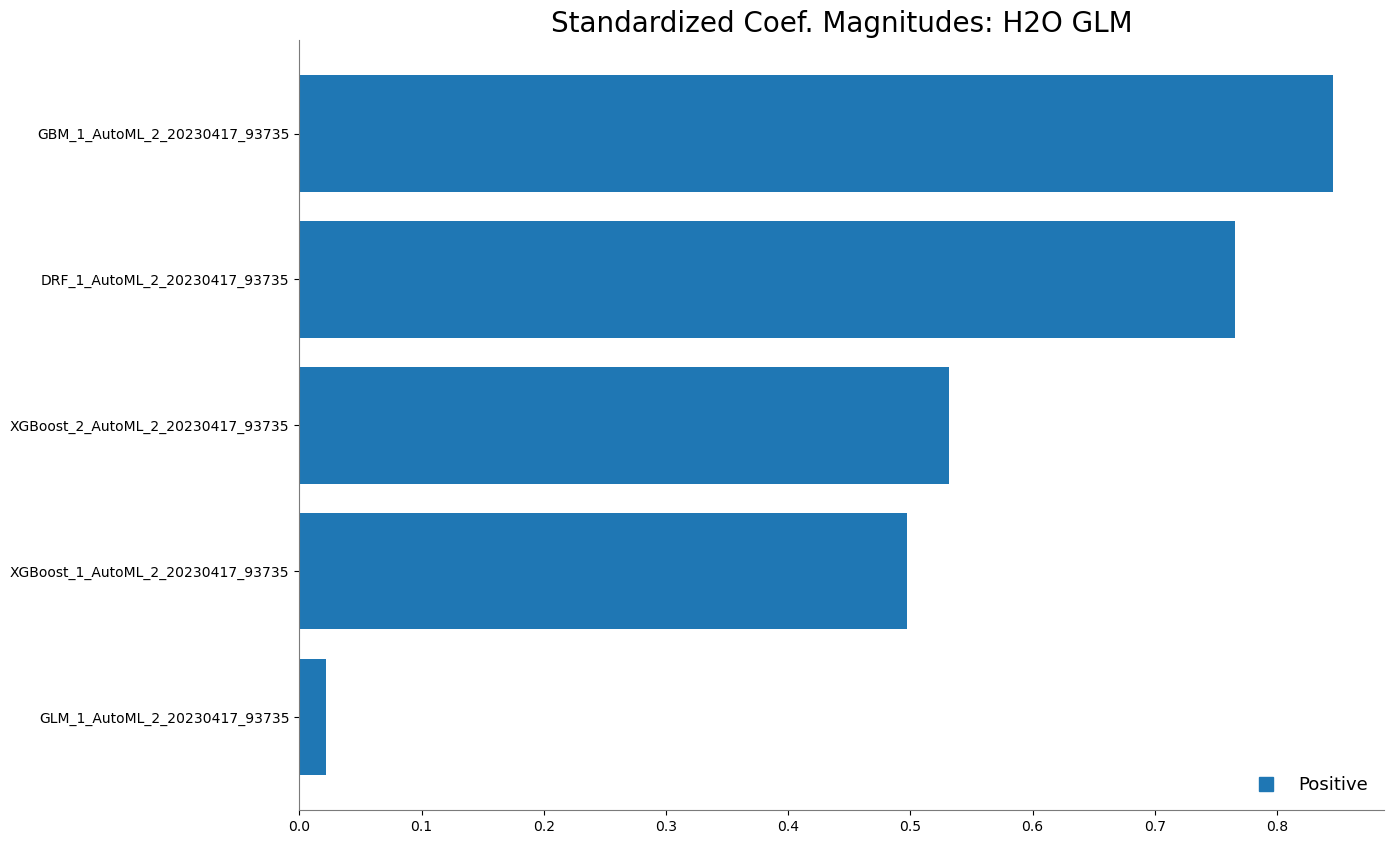

In [ ]:
%matplotlib inline
# contribucion de cada modelo base al SuperLearner
metalearner.std_coef_plot()

## Regresion

In [ ]:


# Use local data file or download from GitHub
import os
docker_data_path = "/home/h2o/data/automl/powerplant_output.csv"
if os.path.isfile(docker_data_path):
  data_path = docker_data_path
else:
  data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/powerplant_output.csv"


# Load data into H2O
data = h2o.import_file(data_path)
data.describe()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:9568
Cols:5

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
type,real,real,real,real,real
mins,1.81,25.36,992.89,25.56,420.26
mean,19.651231187290968,54.30580372073578,1013.2590781772575,73.30897784280936,454.36500940635455
maxs,37.11,81.56,1033.3,100.16,495.76
sigma,7.452473229611079,12.707892998326809,5.938783705811604,14.600268756728953,17.066994999803416
zeros,0,0,0,0,0
missing,0,0,0,0,0
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56


In [ ]:
# escoger y target/response dependiente y x predictores

y = "HourlyEnergyOutputMW"

In [ ]:
# dividir base en datos de entrenamiento y datos de prueba

splits = data.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

train

TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
14.96,41.76,1024.07,73.17,463.26
25.18,62.96,1020.04,59.08,444.37
20.86,57.32,1010.24,76.64,446.48
10.82,37.5,1009.23,96.62,473.9
26.27,59.44,1012.23,58.77,443.67
15.89,43.96,1014.02,75.24,467.35
9.48,44.71,1019.12,66.43,478.42
14.64,45,1021.78,41.25,475.98
17.99,43.72,1008.64,75.04,453.02
20.14,46.93,1014.66,64.22,453.99


In [ ]:
# parametros: 
# x=nombre de predictores, y=nombre de y_target
# training_frame= datos de entrenamiento, validation_frame= datos de validación(sintonización), blending_frame=datos de entrenamiento Ensembles
# parametros de parada AutoML: max_runtime_secs= tiempo de parada default 1h, max_models=numero de modelos
# nfolds= numero de k-fold cv, balance_classes=True oversampling/undersampling de clases, class_sampling_factors=[float] proporcion de clases

# stopping_metric:[AUTO,anomaly_score,deviance,logloss,MSE,RMSE,MAE,RMSLE,AUC,AUCPR,misclassification,mean_per_class_error,custom,custom_increasing]
# stopping_tolerance= tolerancia en la metrica de parada, stopping_rounds=numero de rounds de entrenamiento en que no mejora la metrica de parada
# seed=-1 replicabilidad
# keep_cross_validation_predictions=True
# keep_cross_validation_models=True
# keep_cross_validation_fold_assignment=True
# export_checkpoints_dir= exportar modelos

aml = H2OAutoML(max_models = 5, nfolds=5,
                stopping_metric = "AUTO",
                stopping_rounds = 10, 
                keep_cross_validation_predictions = True,
                keep_cross_validation_models = True, 
                keep_cross_validation_fold_assignment = True,
                export_checkpoints_dir = "automl_reg1",
                seed = 1, project_name = "powerplant_lb_frame")
aml.train(y = y, training_frame = train, leaderboard_frame = test)



AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
aml.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20230417_104925,3.22229,10.3832,2.22894,0.00710132,10.3832
StackedEnsemble_BestOfFamily_1_AutoML_3_20230417_104925,3.26172,10.6388,2.26577,0.00718912,10.6388
XGBoost_1_AutoML_3_20230417_104925,3.38985,11.4911,2.416,0.00746637,11.4911
XGBoost_2_AutoML_3_20230417_104925,3.41531,11.6644,2.39952,0.00751781,11.6644
GBM_1_AutoML_3_20230417_104925,3.4387,11.8247,2.41094,0.00757136,11.8247
DRF_1_AutoML_3_20230417_104925,3.50968,12.3178,2.4699,0.00773418,12.3178
GLM_1_AutoML_3_20230417_104925,4.58723,21.0427,3.60298,0.0100938,21.0427


In [ ]:

# generar predicciones con datos de prueba
pred = aml.predict(test)
pred.head()



stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
485.918
474.678
467.102
452.454
448.605
469.004
442.564
464.44
441.897
431.778


In [ ]:
# metricas de evaluacion

perf = aml.leader.model_performance(test)
perf



ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 10.38315569944552
RMSE: 3.2222904430615067
MAE: 2.2289380712128155
RMSLE: 0.007101319039288161
Mean Residual Deviance: 10.38315569944552
R^2: 0.9644772375783892
Null degrees of freedom: 1890
Residual degrees of freedom: 1885
Null deviance: 552731.9947439376
Residual deviance: 19634.54742765148
AIC: 9805.715081701479

In [ ]:
h2o.shutdown(prompt=False)

H2O session _sid_b007 closed.


/tmp/ipykernel_29466/1954269801.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)
